# Background & Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.


# Objective
 
1.	To predict whether a liability customer will buy a personal loan or not.
2.	Which variables are most significant.
3.	Which segment of customers should be targeted more.


**Data Dictionary ** 

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


### Topics Index

- <a href = #link1>Import Python libraries </a>
- <a href = #link2> Acquire the data set and basic EDA (Exploratory Data Analysis)</a>
- <a href = #link3> Data Pre-processing: conversion, dropping records and columns, inserting to nulls, dummmies</a>
- <a href = #link4> Univariable analysis</a>
- <a href = #link5> Bivariate and Multivariate Analysis</a>
- <a href = #link6> Data Pre-processing - Basic summary statistics fixes (E.g. outliers, etc)</a>
- <a href = #link7> Model building - Logistic Regression </a>
- <a href = #link8> Logistic Regression - Model performance evaluation and improvement </a>
- <a href = #link9> Model building - Decision Tree </a>
- <a href = #link10> Decision Tree - Model performance evaluation and improvement </a>
- <a href = #link11> Conclusions and wrap up</a>
 


# <a name='link1'>Import Python libraries </a>

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different decision tree models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)


# <a name='link2'>Acquire the data set and basic EDA (Exploratory Data Analysis) </a>

Loading the data into python to explore and understand it.

# Data acquisition 

In [2]:
loan = pd.read_csv("Loan_Modelling.csv")
print(f"There are {loan.shape[0]} rows and {loan.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
loan.sample(n=10)

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


# Exploratory Data Analysis

In [3]:
# Get information about data type and nulls in the data set
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Summary of the above results:
- Variables are quantitative 
- No missing values

In [4]:
# Basic summary stats - numeric variables
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations**
- ID is not a valuable variable, we should drop it later
- Mean and average age are ~45 years old
- Family size is around the 2 + members 
- But let perform univariable and multivariable analysis for more detailed insights



# <a name='link4'>Univariable analysis</a>

In [5]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

We are using the histogram_boxplot function for the numeric variables with numerous continuous values.

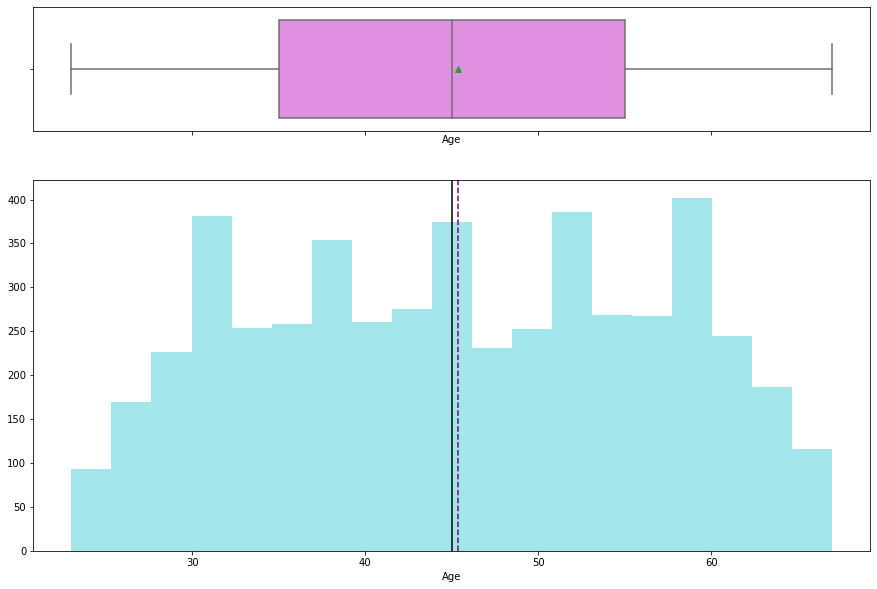

In [6]:
histogram_boxplot(loan.Age)

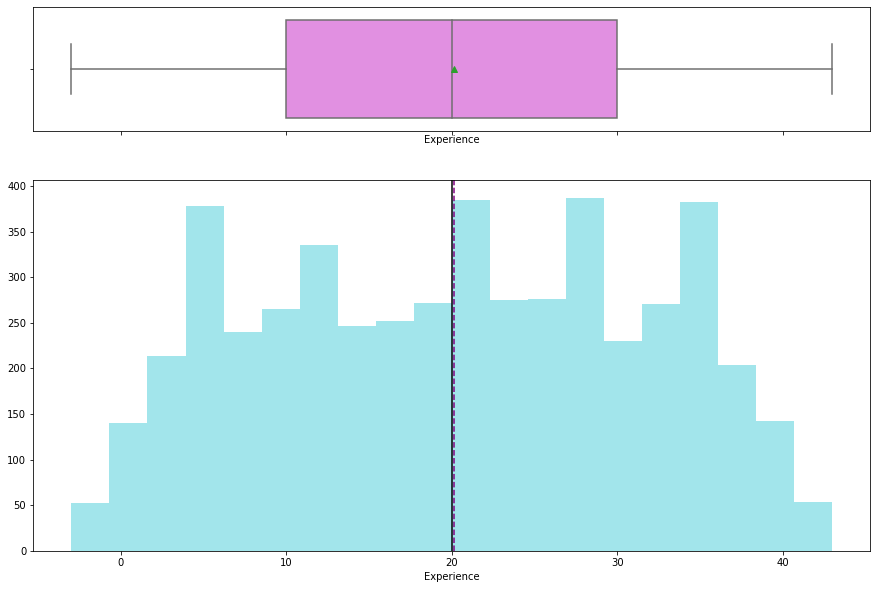

In [7]:
histogram_boxplot(loan.Experience)

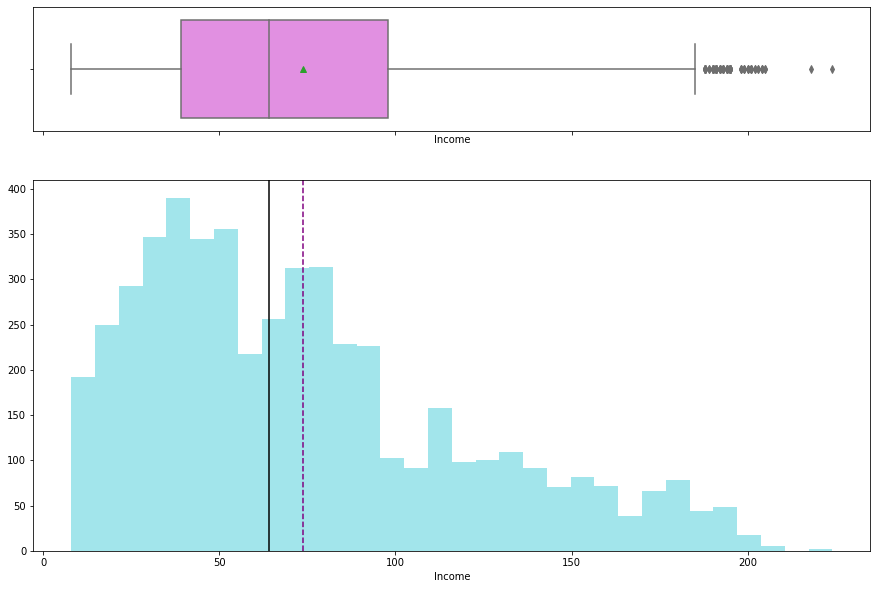

In [8]:
histogram_boxplot(loan.Income)

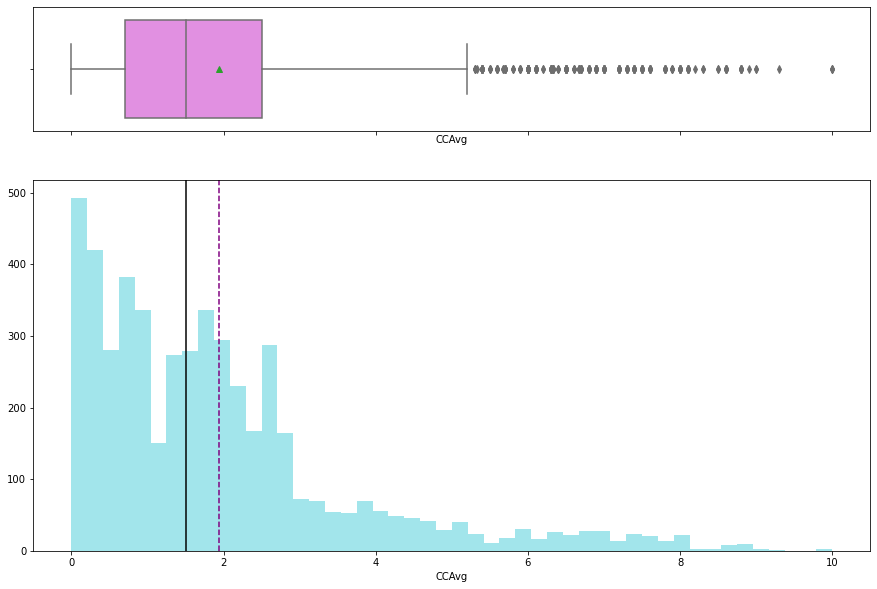

In [9]:
histogram_boxplot(loan.CCAvg)

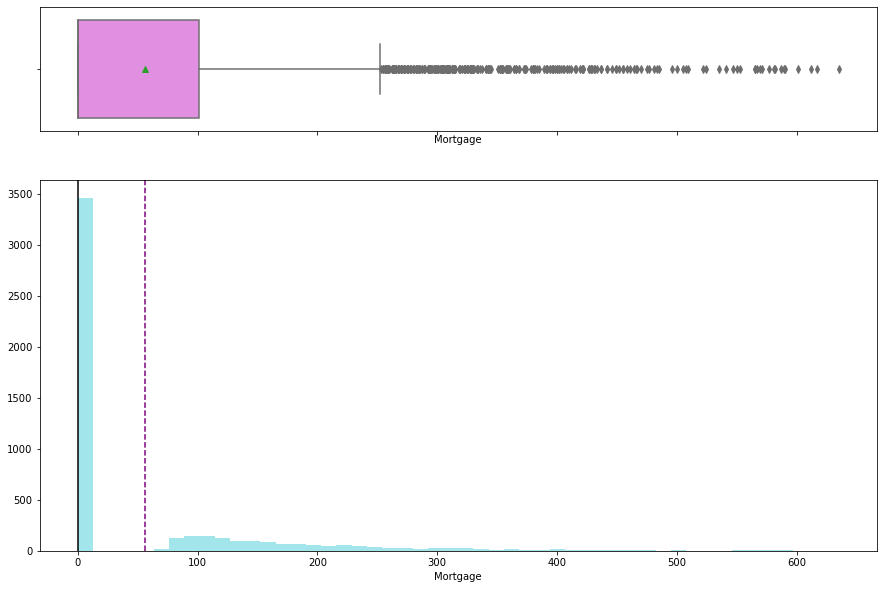

In [10]:
histogram_boxplot(loan.Mortgage)

Observations from the above histograms and boxplots:
- Mortgages, it looks like the great majority of the customer is not having (zero has the  highest count), and the distribution is right-skewed having a lot of outliers
- Average spending on credit cards is having a right skewness with a long tail and numerous outliers
- The income is having outliers in the high end, still is right-skewed but less vs. the previous two variables
- Experience and age are more normally distributed w/o outliers
- Outliers to handle later: Morgage, Income, Credit Cards expending. The rest of the variables aren’t having outliers’ values (e.g., 1 -2, 1-4).




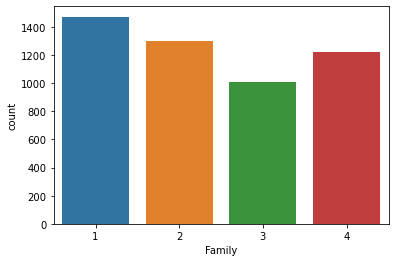

In [11]:
# Look into the number of family members
sns.countplot (data = loan, x='Family'  );
plt.show ()

Let use a simple pie for visualization as the below variables are binary 

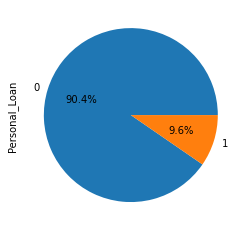

In [12]:
# Look into Personal Loan
nbr_of_Personal_Loan = loan.groupby("Personal_Loan")["Personal_Loan"].count()
nbr_of_Personal_Loan
nbr_of_Personal_Loan.plot.pie(autopct="%.1f%%");

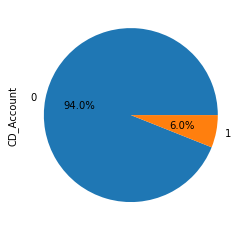

In [13]:
# Look into certificate of deposit (CD) 
nbr_of_CD_Account = loan.groupby("CD_Account")["CD_Account"].count()
nbr_of_CD_Account
nbr_of_CD_Account.plot.pie(autopct="%.1f%%");

In [14]:
# function to create labeled barplots, it's a fancier function


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

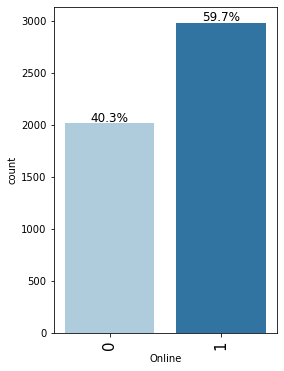

In [15]:
labeled_barplot(loan, "Online", perc=True)

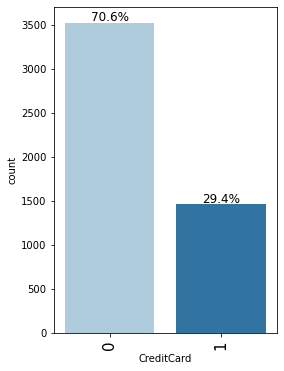

In [16]:
labeled_barplot(loan, "CreditCard", perc=True)

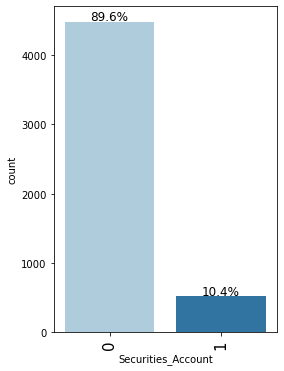

In [17]:
labeled_barplot(loan, "Securities_Account", perc=True)

Insights from the univariable analysis:
- Personal loan is our dependent variable, it is showing a low rate, only 9.6% of the customers take loans
- Little less than a 1/3 of the customers have a bank credit card 
- Approximately ~60% of the customers use internet services 
- Only ~6% of the customer have a certificate of deposits
- Most of the customers are having 1 to 2 family members, but still, not far away we have customers with 3 and 4
- Like ~10% of the customers are having securities account in the bank



# <a name='link3'>Data Pre-processing: conversion, dropping records and columns, inserting to nulls, dummmies</a>

## Missing Values

Before we start looking at multivariable analysis and correlations, let's quickly check the missingness in the data again.


In [18]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

No missing values
But actions required before multivariable analysis and correlations:
- Drop the variable ID as it's not serving a purpose in modeling DONE   
- Negative experience negative values are not possible; we will assume a manual data entry and convert them into absolute values      DONE  
- Convert Zip Code into County,  it can provide a more meaningful geographical insight


In [19]:
# Let create a copy before data cleaning
loan1 = loan.copy()


In [20]:
# Let check the new dataframe
np.random.seed(1)  # To get the same random results every time
loan1.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


In [21]:
# Drop the column ID
loan1.drop(['ID'], axis=1, inplace=True)

In [22]:
# Validate the task was completed right

loan1.head ()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
# Convert negative Experience with absolute value 
 
loan1['Experience']=loan1['Experience'].abs()

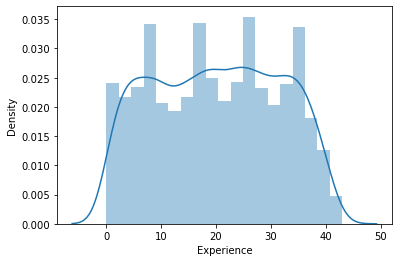

In [24]:
# Validate the task was completed right
sns.distplot(loan1.Experience) # plots a frequency polygon superimposed on a histogram using the seaborn package.
# seaborn automatically creates class intervals. 

The results show Experience data was fixed.

In [25]:
# Count Zip Codes unique values
print(loan1.ZIPCode.value_counts())

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
92694      1
94404      1
94598      1
94965      1
Name: ZIPCode, Length: 467, dtype: int64


In [26]:
# Let import the Zipcode library 
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

In [27]:
# Let test example for NYC, does it work ?
zipcode1 = search.by_zipcode("10001")
zipcode1

SimpleZipcode(zipcode='10001', zipcode_type='Standard', major_city='New York', post_office_city='New York, NY', common_city_list=['New York'], county='New York County', state='NY', lat=40.75, lng=-73.99, timezone='Eastern', radius_in_miles=0.9090909090909091, area_code_list=['718', '917', '347', '646'], population=21102, population_density=33959.0, land_area_in_sqmi=0.62, water_area_in_sqmi=0.0, housing_units=12476, occupied_housing_units=11031, median_home_value=650200, median_household_income=81671, bounds_west=-74.008621, bounds_east=-73.984076, bounds_north=40.759731, bounds_south=40.743451)

In [28]:
# Let define function to add the variable County
def convert_zipcode_county (zipcode):
    """This function converts ZIPCode to County"""
    zipcode = search.by_zipcode("*")
    
          
    for c in ZIPCode:
        data = zipcode
        
    return zipcode 

In [29]:
# Let take care of None
def zco(x):
    county = search.by_zipcode(x).county
    return county if county else x  # if city is None for certain zipcodes, take advantage of the truthiness of None

In [30]:
# Apply the function by adding County 
loan1['County'] = loan1['ZIPCode'].fillna(0).astype(str).apply(zco)
loan1['County']

0         Los Angeles County
1         Los Angeles County
2             Alameda County
3       San Francisco County
4         Los Angeles County
                ...         
4995           Orange County
4996        San Diego County
4997          Ventura County
4998      Los Angeles County
4999           Orange County
Name: County, Length: 5000, dtype: object

In [31]:
# Count County unique values
print(loan1.County.value_counts())

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

In [32]:
# Validate the dataframe 
loan1.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [33]:
# We can drop the ZIPCode variable as we are not going to use it moving forward 
loan1.drop(['ZIPCode'], axis=1, inplace=True)

In [33]:
# Checking the task was completed 
loan1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Los Angeles County


In [34]:
# Count County unique values
print(loan1.County.value_counts())

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
San Luis Obispo County      33
Solano County               33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
92717                       22
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

34 ZIPCodes are not having a relevant County, let take care of these records

In [34]:
# We will replace the Zip codes with None 
loan1["County_fixed"] = loan1["County"].str.replace("92717", "NONE").str.replace("96651", "NONE").str.replace("92634", "NONE").str.replace("93077", "NONE")
 

 

In [35]:
# Count County unique values, let check the task was completed
print(loan1.County_fixed.value_counts())

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
NONE                        34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne

In [36]:
# Creatring a new data frame with dummies but maintaining the previous for Bivariate and Multivariate Analysis purposes
loan2 = loan1.copy()

In [37]:

# Create dummies for County
loan2 = pd.get_dummies(loan2, columns=["County_fixed"], drop_first=True)
np.random.seed(1)
loan2.sample(n=10)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,County_fixed_Butte County,County_fixed_Contra Costa County,County_fixed_El Dorado County,County_fixed_Fresno County,County_fixed_Humboldt County,County_fixed_Imperial County,County_fixed_Kern County,County_fixed_Lake County,County_fixed_Los Angeles County,County_fixed_Marin County,County_fixed_Mendocino County,County_fixed_Merced County,County_fixed_Monterey County,County_fixed_NONE,County_fixed_Napa County,County_fixed_Orange County,County_fixed_Placer County,County_fixed_Riverside County,County_fixed_Sacramento County,County_fixed_San Benito County,County_fixed_San Bernardino County,County_fixed_San Diego County,County_fixed_San Francisco County,County_fixed_San Joaquin County,County_fixed_San Luis Obispo County,County_fixed_San Mateo County,County_fixed_Santa Barbara County,County_fixed_Santa Clara County,County_fixed_Santa Cruz County,County_fixed_Shasta County,County_fixed_Siskiyou County,County_fixed_Solano County,County_fixed_Sonoma County,County_fixed_Stanislaus County,County_fixed_Trinity County,County_fixed_Tuolumne County,County_fixed_Ventura County,County_fixed_Yolo County
2764,31,5,84,1,2.9,3,105,0,0,0,0,1,Ventura County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4767,35,9,45,3,0.9,1,101,0,1,0,0,0,Los Angeles County,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0,0,Santa Clara County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,0,1,0,Alameda County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2735,36,12,70,3,2.6,2,165,0,0,0,1,0,San Diego County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3922,31,4,20,4,1.5,2,0,0,0,0,1,0,Yolo County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2701,50,26,55,1,1.6,2,0,0,0,0,1,0,Santa Clara County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1179,36,11,98,3,1.2,3,0,0,1,0,0,1,Los Angeles County,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,51,27,112,3,1.8,2,0,0,1,1,1,1,Alameda County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
792,41,16,98,1,4.0,3,0,0,0,0,0,1,Santa Barbara County,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [38]:
# We can drop the County as we have created dummies for the data frame purposed for modeling
loan2.drop(['County'], axis=1, inplace=True)

In [39]:
# Let check the task was completed
loan2.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_fixed_Butte County,County_fixed_Contra Costa County,County_fixed_El Dorado County,County_fixed_Fresno County,County_fixed_Humboldt County,County_fixed_Imperial County,County_fixed_Kern County,County_fixed_Lake County,County_fixed_Los Angeles County,County_fixed_Marin County,County_fixed_Mendocino County,County_fixed_Merced County,County_fixed_Monterey County,County_fixed_NONE,County_fixed_Napa County,County_fixed_Orange County,County_fixed_Placer County,County_fixed_Riverside County,County_fixed_Sacramento County,County_fixed_San Benito County,County_fixed_San Bernardino County,County_fixed_San Diego County,County_fixed_San Francisco County,County_fixed_San Joaquin County,County_fixed_San Luis Obispo County,County_fixed_San Mateo County,County_fixed_Santa Barbara County,County_fixed_Santa Clara County,County_fixed_Santa Cruz County,County_fixed_Shasta County,County_fixed_Siskiyou County,County_fixed_Solano County,County_fixed_Sonoma County,County_fixed_Stanislaus County,County_fixed_Trinity County,County_fixed_Tuolumne County,County_fixed_Ventura County,County_fixed_Yolo County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Compare the baseline dataframe vs. the transformed ones

print ('Loan dataset -> ' , loan.shape)
 
print ('Loan1 dataset -> ', loan1.shape)

print ('Loan2 dataset -> ', loan2.shape)

Loan dataset ->  (5000, 14)
Loan1 dataset ->  (5000, 14)
Loan2 dataset ->  (5000, 50)



# <a name='link5'>Bivariate and Multivariate Analysis</a>

### Bivariate Distributions

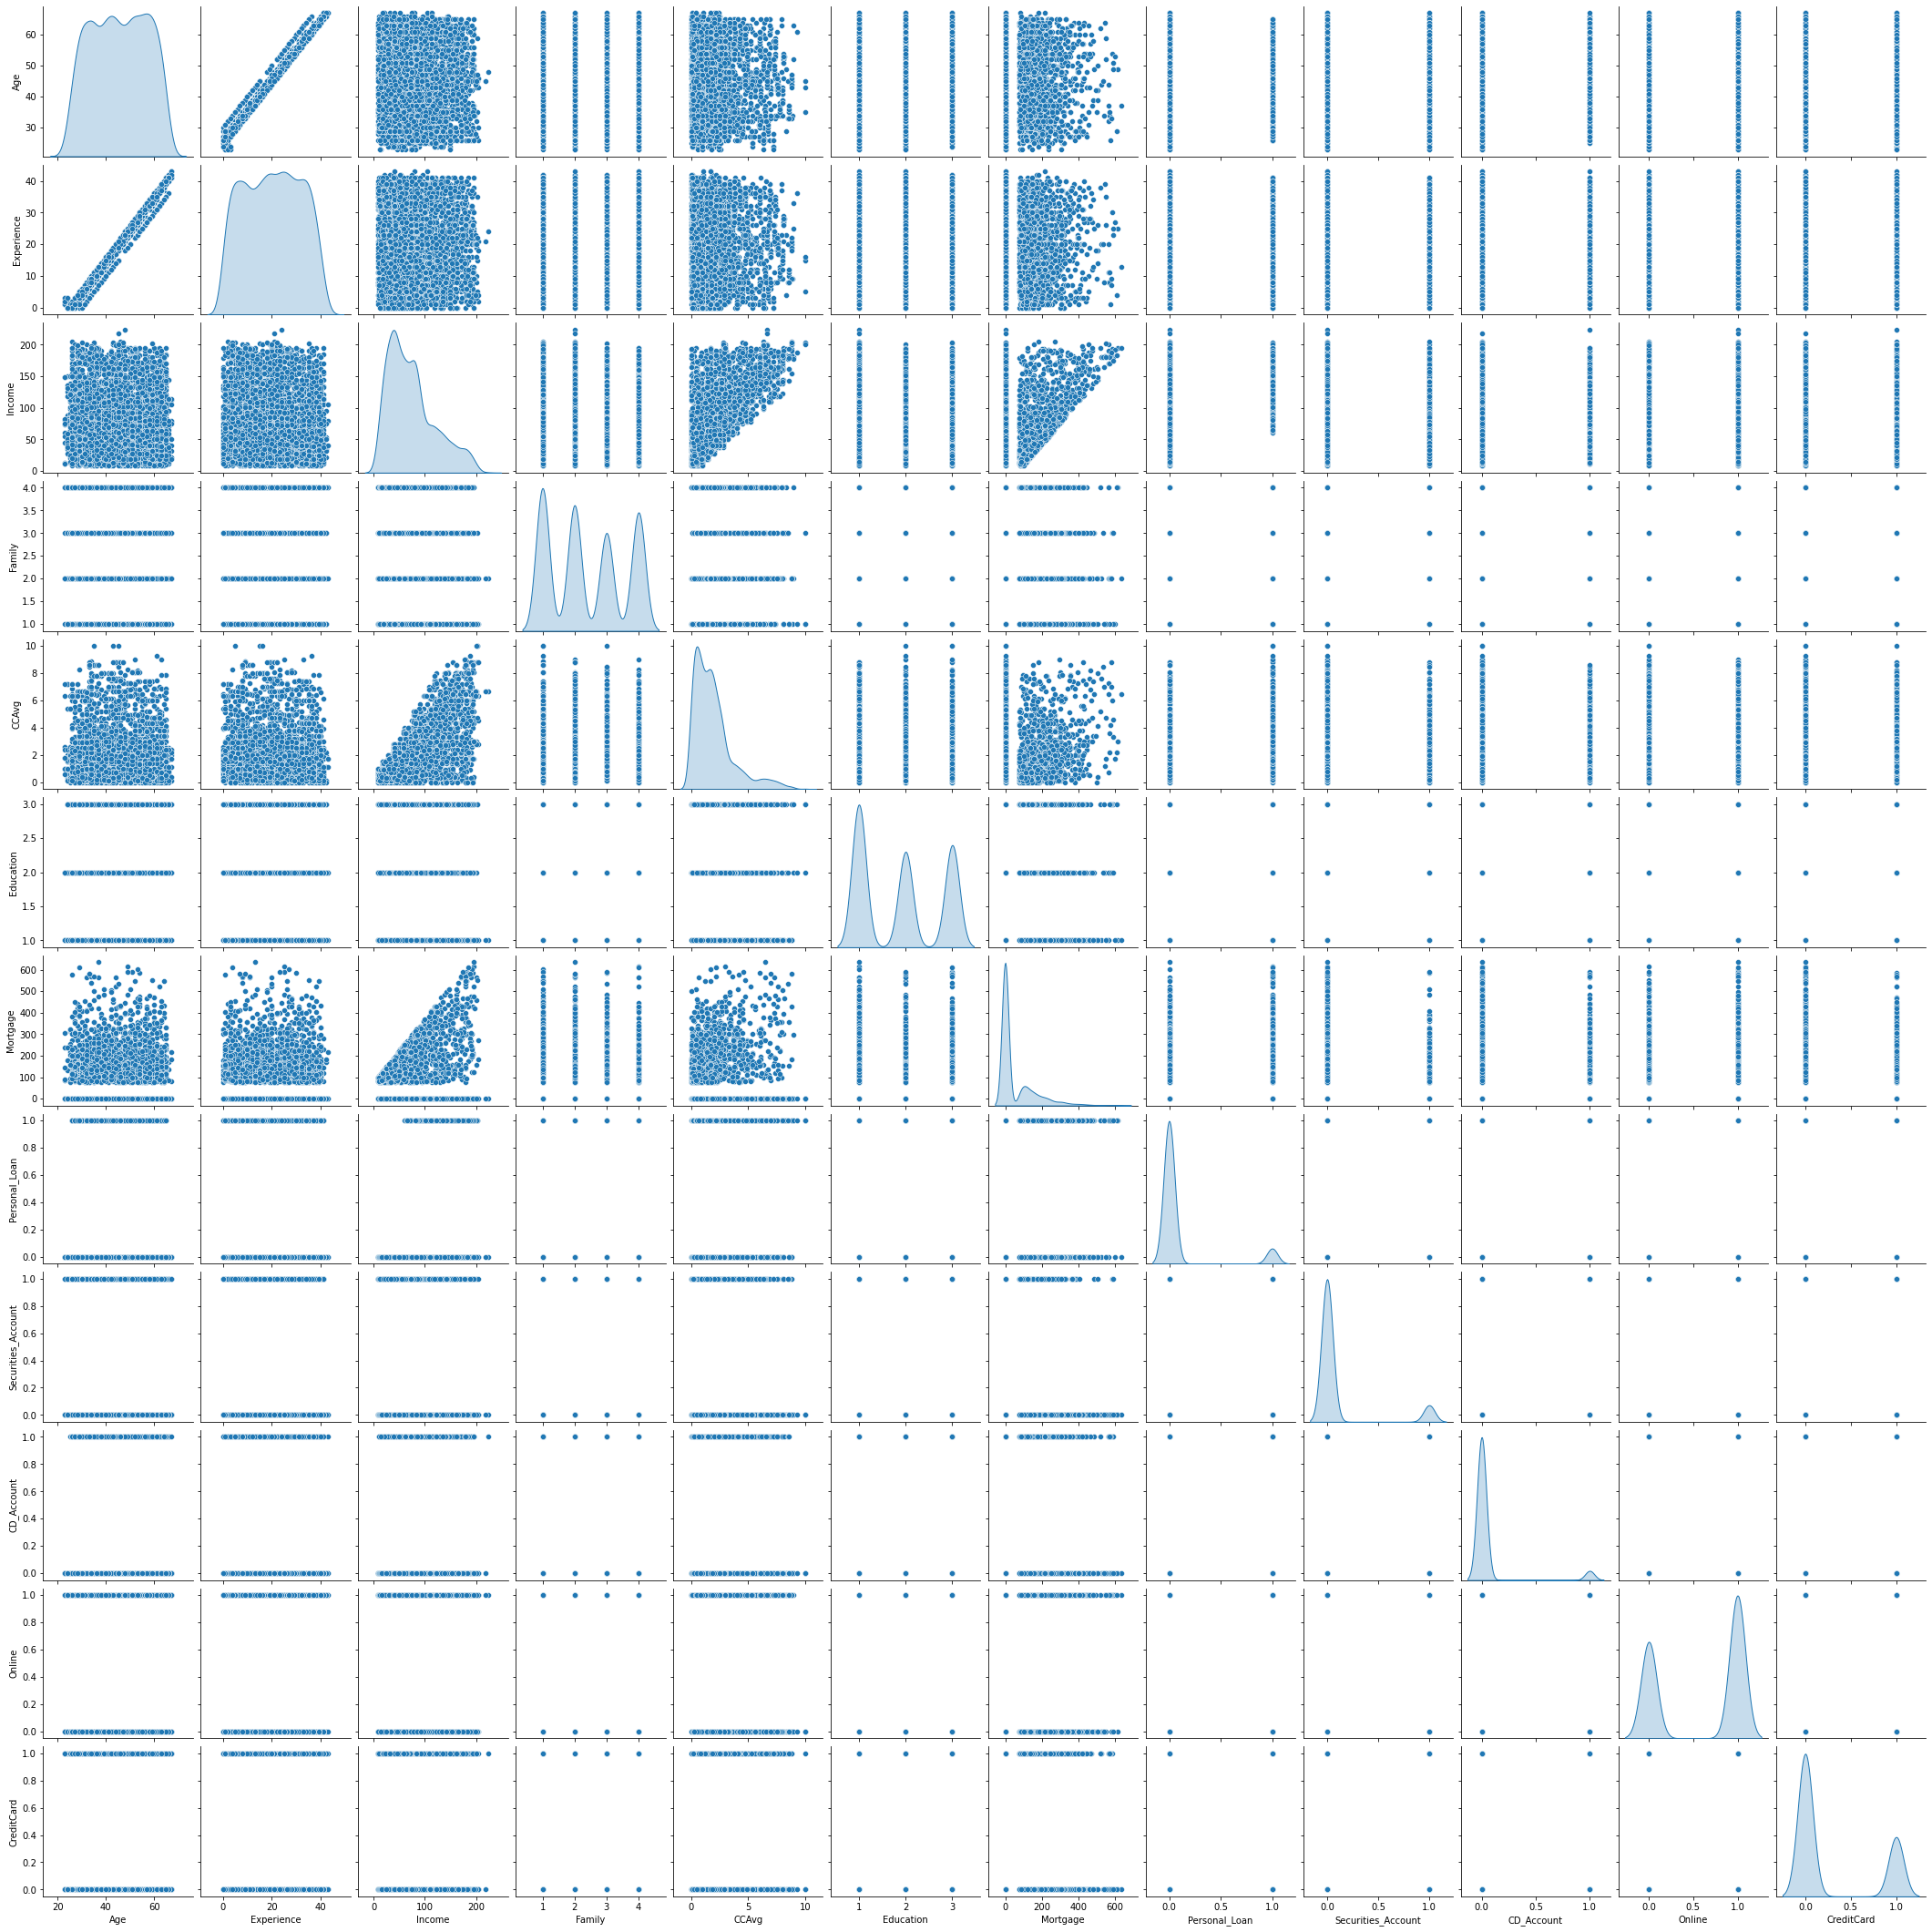

In [41]:
# Create plots for possible correlation recognitions
sns.pairplot(loan1,diag_kind='kde')



It's very difficult to check some of the diagrams above so let check as well a correlation heatmap to complete the analysis


### Correlation between Numeric Variables

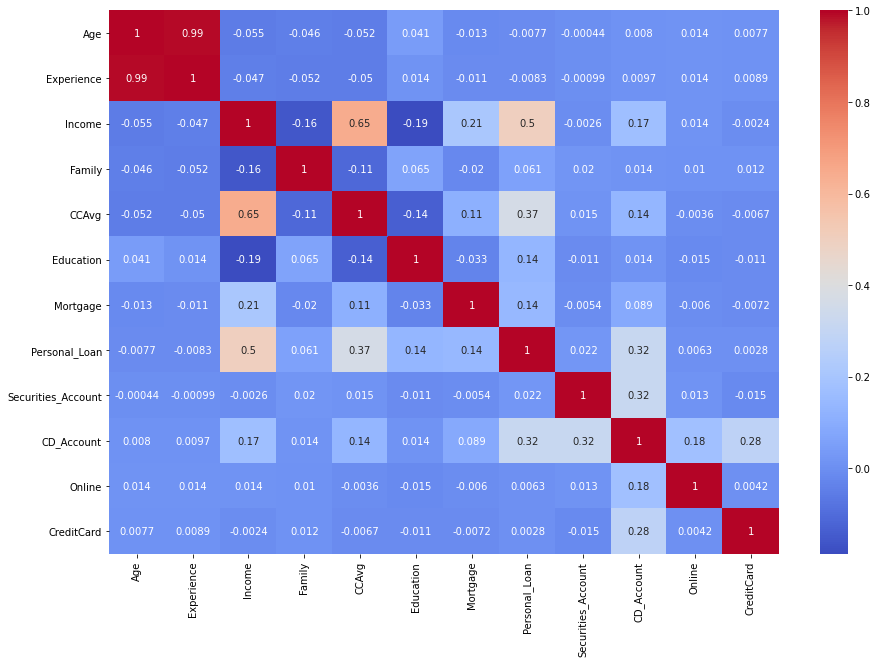

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(loan1.corr(), annot=True, cmap="coolwarm")

**Observations**

- Experience and age are highly correlated to an almost 1 to 1 ratio, and it makes sense as older people have been in the labor market for longer typically.
- As well credit card expenses and income are positively correlated, 65%.
- Income and personal loans as well correlated like 50%.
- Lower rate of correlation we can find with personal loan and credit card expenses: ~37%, followed by certified of deposit correlation with a personal loan and Securities Account: ~32%. As well certificate of deposit and income are having some positive correlation: ~17%, and ~14 with credit card expenses, income and mortgage are having positive ~21% correlation. 
- The rest of the positive correlations are close to 10% or even less.
- Relevant negative correlations, education, and income: ~19%, and family and income: ~16%.
- Last the rest of the negative correlations are very small, less than ~10%.
 

Some of the correlations are interesting so let have a closer look.



### Further Multivariable EDA

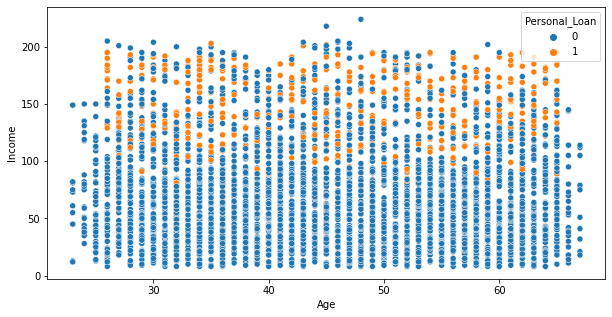

In [43]:
# Check the Income to Age correlate and relate to taking a loan as well

plt.figure(figsize=(10, 5))
sns.scatterplot(y="Income", x="Age", hue="Personal_Loan", data=loan1)

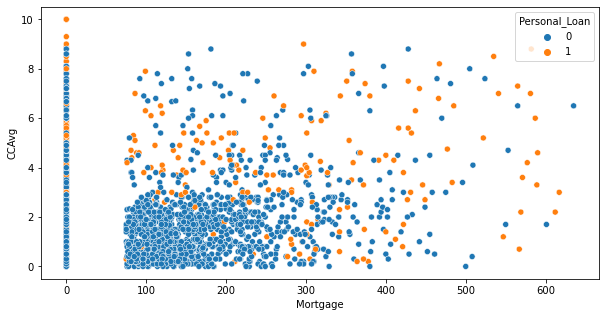

In [44]:
# Check the Credit Card expenses to Mortage correlate and relate to taking a loan as well

plt.figure(figsize=(10, 5))
sns.scatterplot(y="CCAvg", x="Mortgage", hue="Personal_Loan", data=loan1)

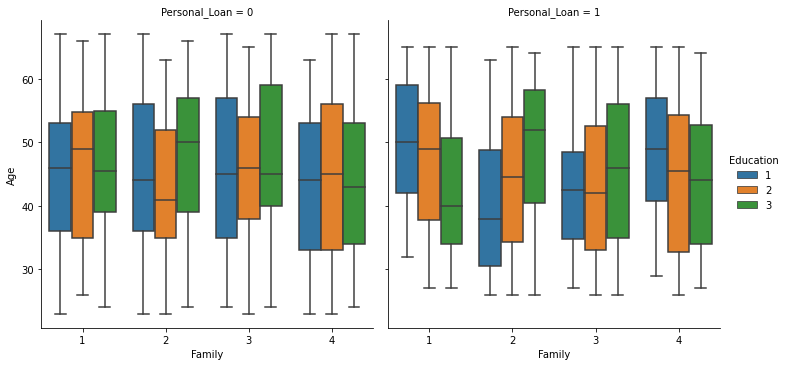

In [45]:
# Checking deeper the demographics of the customer base
# Look for a clue about segmentation and relationships  

sns.catplot(x="Family",
               y = "Age",
               hue="Education", 
               col="Personal_Loan", 
               data=loan1, 
               kind="box");

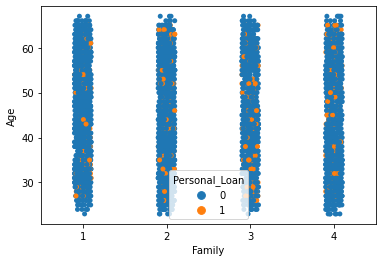

In [46]:
# Deeper into Family and Age? We can use a strip plot 
sns.stripplot(data = loan1, x='Family', y ='Age' , hue='Personal_Loan', jitter=True);
plt.show()

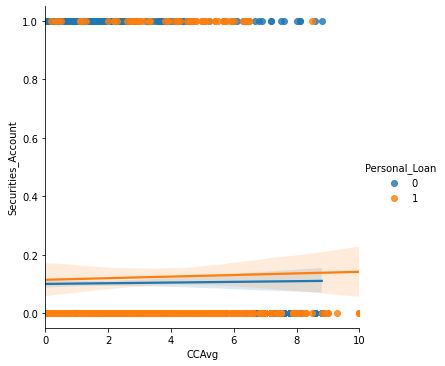

In [47]:

# We are looking for a different angle, Securities Account and credit card expenses correlate, 
# and if anything we can learn about taking a loan

sns.lmplot (data= loan1 , x = 'CCAvg', y ='Securities_Account' , hue='Personal_Loan' , fit_reg =True);
plt.show()

In [48]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan              0    1   All
County_fixed                           
All                     4520  480  5000
Los Angeles County       984  111  1095
Santa Clara County       492   71   563
San Diego County         509   59   568
Alameda County           456   44   500
Orange County            309   30   339
San Francisco County     238   19   257
Sacramento County        169   15   184
Monterey County          113   15   128
San Mateo County         192   12   204
Contra Costa County       73   12    85
Ventura County           103   11   114
Santa Barbara County     143   11   154
Yolo County              122    8   130
Santa Cruz County         60    8    68
Kern County               47    7    54
Marin County              48    6    54
Sonoma County             22    6    28
Riverside County          50    6    56
San Luis Obispo County    28    5    33
Shasta County             15    3    18
San Bernardino County     98    3   101
Solano County             30    3    33


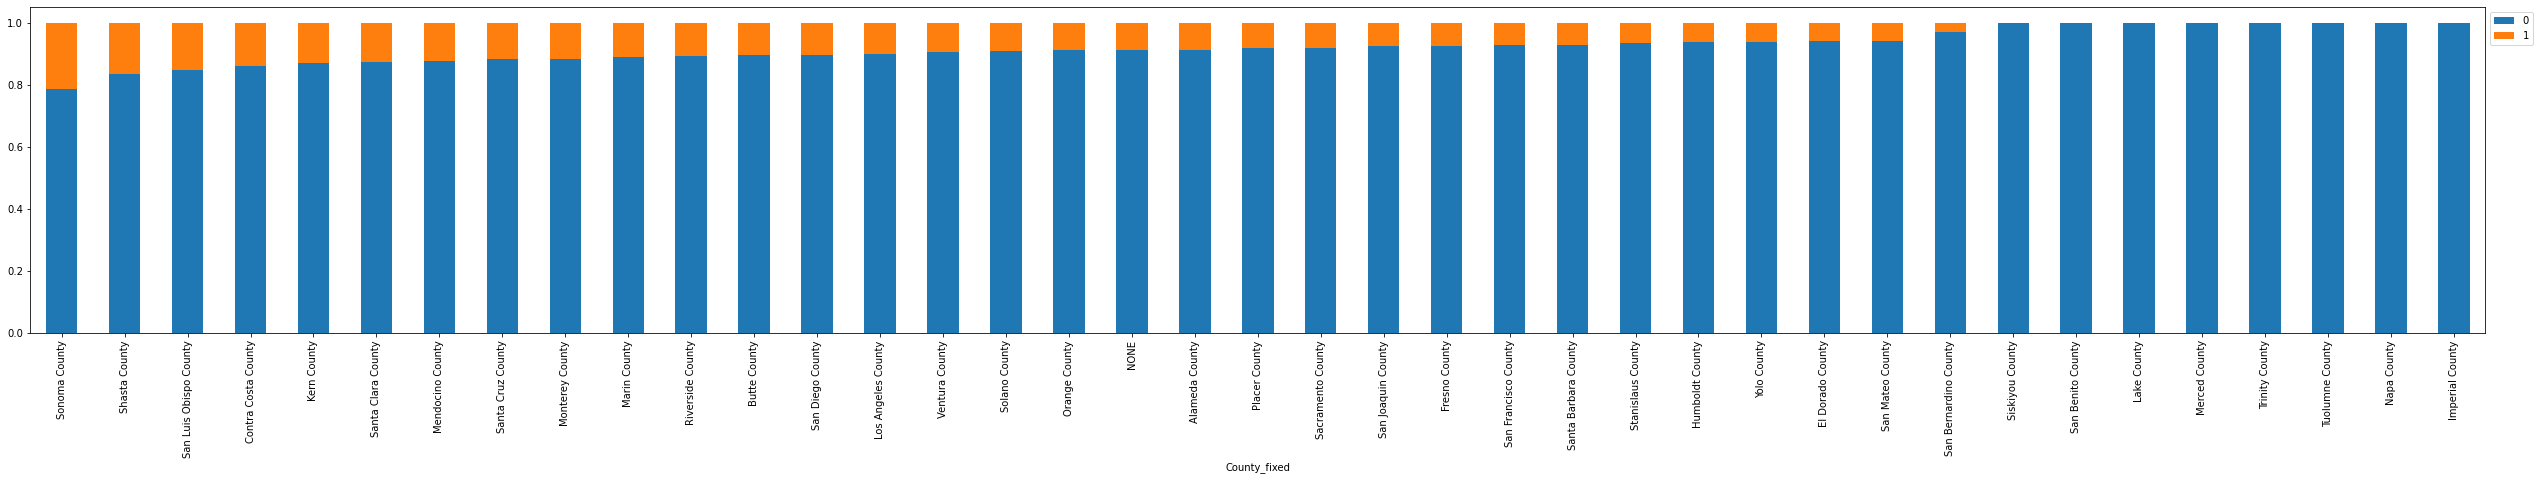

In [49]:
stacked_barplot(loan1, "County_fixed" , "Personal_Loan")

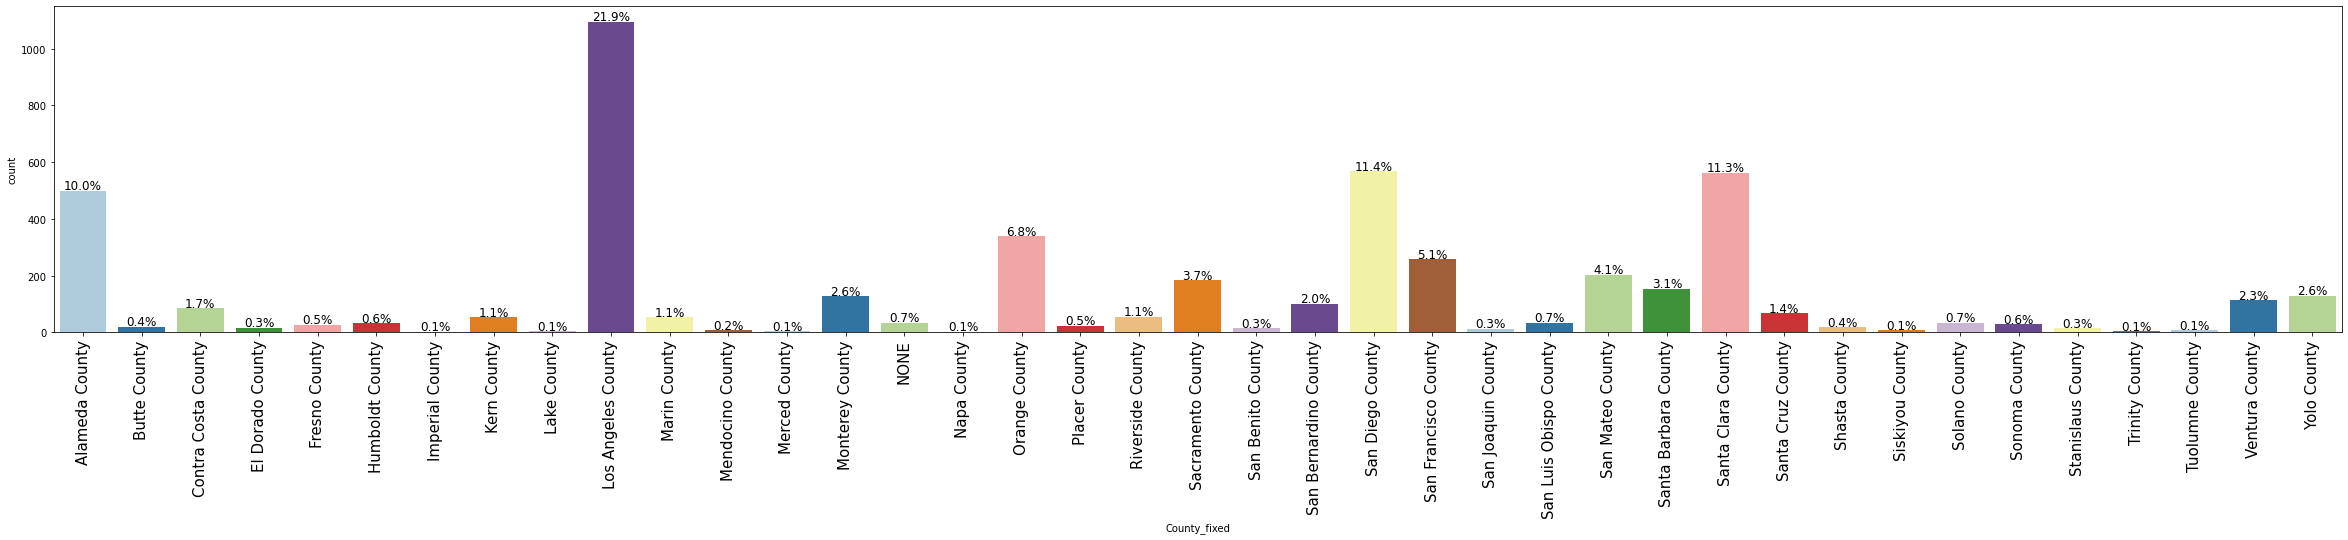

In [50]:
# Just one more univariable check for further analysis 
labeled_barplot(loan1, "County_fixed", perc=True)

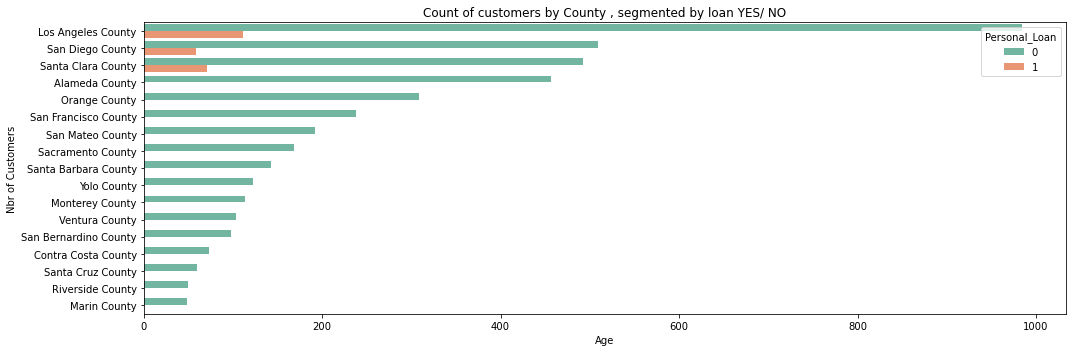

In [51]:
# Function to count the number of customers by County segmented by loan YES/ NO, using age arbitrary just for count purposes 
loan_count  = loan1['Age'].groupby([loan1['County_fixed'],loan1['Personal_Loan']]).count()  # number of customers by country and taken loan YES/ NO
loan_count = loan_count.reset_index().sort_values(by='Age',ascending=False) # sort in descending order
most_count = loan_count.head(20)  # getting the top twentie Counties in terms of customers

fig = plt.figure(figsize=(15,5))
plt.title('Count of customers by County , segmented by loan YES/ NO')

sns.barplot(y='County_fixed',x='Age',hue='Personal_Loan',data=most_count,palette='Set2');

plt.ylabel('Nbr of Customers')
plt.tight_layout()

**Takeaways from the above multivariable analysis **
- Credit card expenses and mortgage maybe positively correlated, and the higher the values the probability to take a loan is higher.
- The higher the income the probability to take a loan is higher across every age.
- Based on the above catplot, if customers taking a loan start at older ages.
- As well the catplot , it’s difficult to provide a very clear pattern.
- It's not clear if family plays a big role in taking a loan.
- It's obvious no linear explanation is feasible for credit card expenses, securities, and taking a loan. But Not having a security account and lower credit card expenses drives the probability of taking a loan. 
- Some counties are having high customers volumes; Los Angeles County, Santa Clara County, San Diego County, Alameda County account for more than half of the customers.
- Then some counties look like are showing a higher tendency to taking loans: Sanoma County, Shasta County, San Luis Obispo County, and Contra Costa County.


The dependent variable and the last graph indicate the path toward logistic regression and decision trees models.


# <a name='link6'>Data Pre-processing - Basic summary statistics fixes (E.g. outliers, etc) </a>

To proceed we need to take care of outliers

In [52]:
# Let create another copy before handling outliers

loan3 = loan2.copy()

In [53]:
np.random.seed(1)  # To get the same random results every time to validata teh dataframe
loan3.sample(n=10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_fixed_Butte County,County_fixed_Contra Costa County,County_fixed_El Dorado County,County_fixed_Fresno County,County_fixed_Humboldt County,County_fixed_Imperial County,County_fixed_Kern County,County_fixed_Lake County,County_fixed_Los Angeles County,County_fixed_Marin County,County_fixed_Mendocino County,County_fixed_Merced County,County_fixed_Monterey County,County_fixed_NONE,County_fixed_Napa County,County_fixed_Orange County,County_fixed_Placer County,County_fixed_Riverside County,County_fixed_Sacramento County,County_fixed_San Benito County,County_fixed_San Bernardino County,County_fixed_San Diego County,County_fixed_San Francisco County,County_fixed_San Joaquin County,County_fixed_San Luis Obispo County,County_fixed_San Mateo County,County_fixed_Santa Barbara County,County_fixed_Santa Clara County,County_fixed_Santa Cruz County,County_fixed_Shasta County,County_fixed_Siskiyou County,County_fixed_Solano County,County_fixed_Sonoma County,County_fixed_Stanislaus County,County_fixed_Trinity County,County_fixed_Tuolumne County,County_fixed_Ventura County,County_fixed_Yolo County
2764,31,5,84,1,2.9,3,105,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4767,35,9,45,3,0.9,1,101,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3814,34,9,35,3,1.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3499,49,23,114,1,0.3,1,286,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2735,36,12,70,3,2.6,2,165,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3922,31,4,20,4,1.5,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2701,50,26,55,1,1.6,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1179,36,11,98,3,1.2,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,51,27,112,3,1.8,2,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
792,41,16,98,1,4.0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0



**Outliers PLans **
- Taking care of the outliers as observed in the univariable analysis: Income, Credit Card expenses, and Morgage are having high outliers
 


### Treating Outliers

In [54]:
# Let use the below function to treat the outliers 
def treat_outliers(data,col):
    '''
    treats outliers in a variable
    col: str, name of the numerical variable
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [55]:
# Getting list of outliers columns
outliers_col = loan3[['Income', 'CCAvg' , 'Mortgage']]

# Treating outliers by using the function on numeric columns
outliers_col = [ele for ele in outliers_col] 
loan3 = treat_outliers_all(loan3,outliers_col)

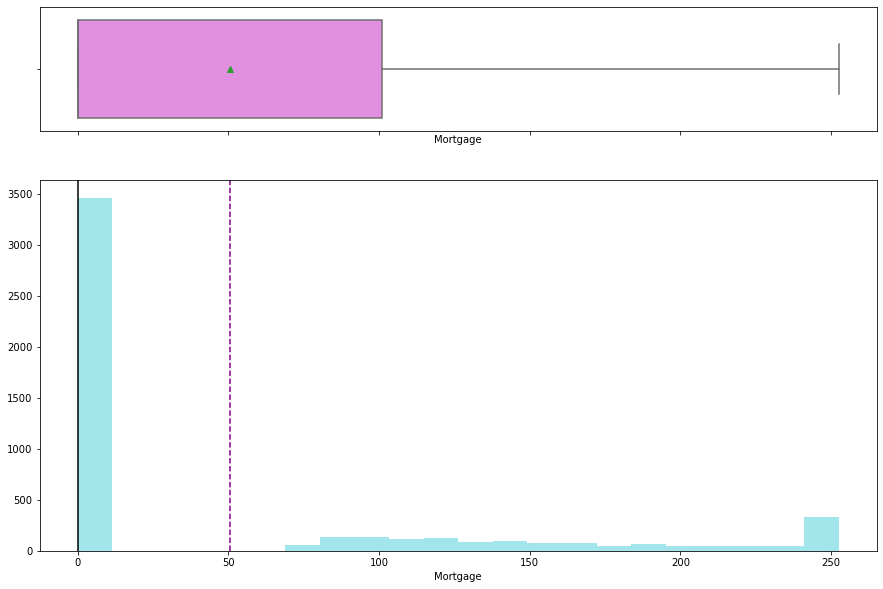

In [56]:
# Lets look at box plots to see if the outlier has been treated or not
histogram_boxplot(loan3.Mortgage)

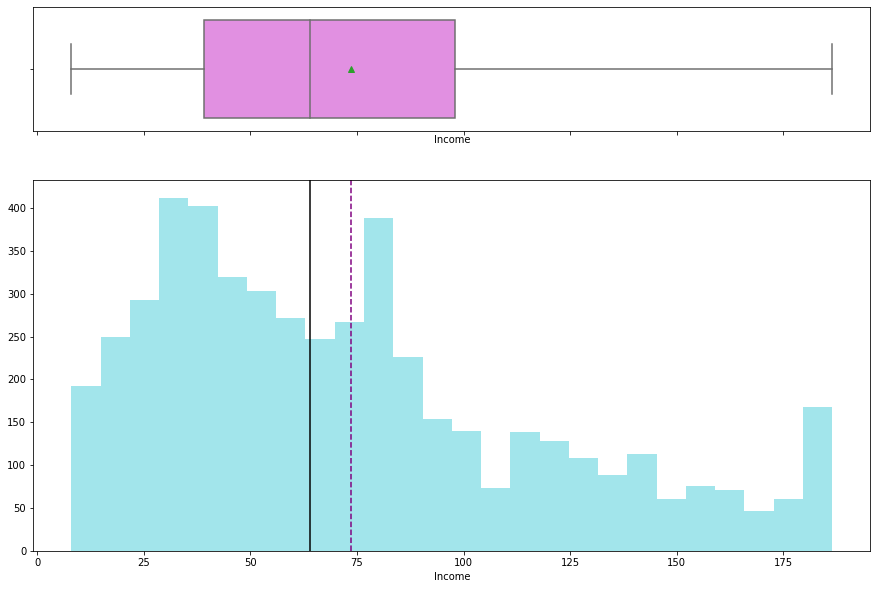

In [57]:
# Lets look at box plots to see if the outlier has been treated or not
histogram_boxplot(loan3.Income)

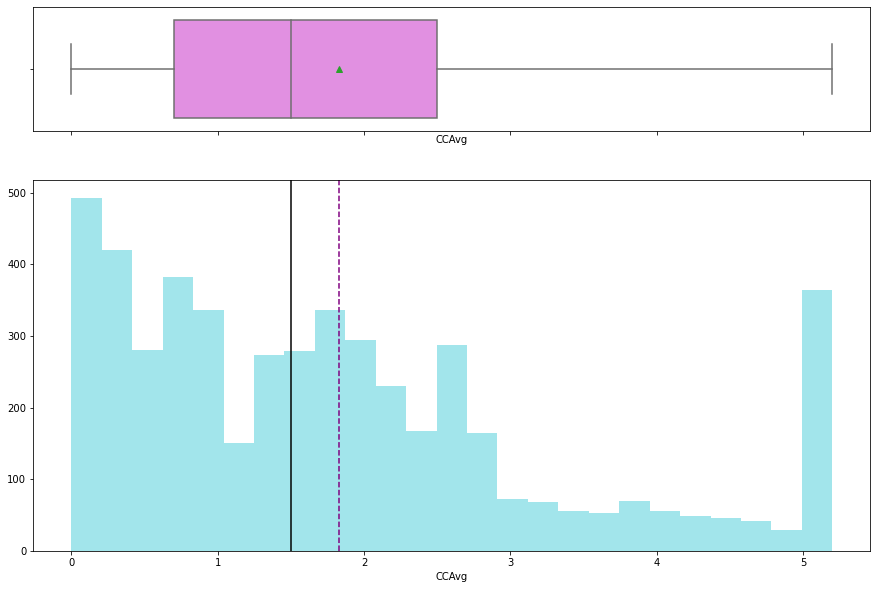

In [58]:
# Lets look at box plots to see if the outlier has been treated or not
histogram_boxplot(loan3.CCAvg)

The above results show the outliers have been taken care


# <a name='link7'>Model building - Logistic Regression </a>

1. What we want to predict ? If the customer will take a loan.  
2. Before we proceed to modelling, we'll have to encode categorical features. We will drop categorical features. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build a Logistics Regression model using the train data.
5. Verify regression assumptions.
6. Evaluate the model performance

### Define dependent variable

In [59]:
# Let create a copy of the data first 
loan10 = loan3.copy() 

In [60]:
# Checking the data was copied well 
loan10.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County_fixed_Butte County,County_fixed_Contra Costa County,County_fixed_El Dorado County,County_fixed_Fresno County,County_fixed_Humboldt County,County_fixed_Imperial County,County_fixed_Kern County,County_fixed_Lake County,County_fixed_Los Angeles County,County_fixed_Marin County,County_fixed_Mendocino County,County_fixed_Merced County,County_fixed_Monterey County,County_fixed_NONE,County_fixed_Napa County,County_fixed_Orange County,County_fixed_Placer County,County_fixed_Riverside County,County_fixed_Sacramento County,County_fixed_San Benito County,County_fixed_San Bernardino County,County_fixed_San Diego County,County_fixed_San Francisco County,County_fixed_San Joaquin County,County_fixed_San Luis Obispo County,County_fixed_San Mateo County,County_fixed_Santa Barbara County,County_fixed_Santa Clara County,County_fixed_Santa Cruz County,County_fixed_Shasta County,County_fixed_Siskiyou County,County_fixed_Solano County,County_fixed_Sonoma County,County_fixed_Stanislaus County,County_fixed_Trinity County,County_fixed_Tuolumne County,County_fixed_Ventura County,County_fixed_Yolo County
0,25,1,49.0,4,1.6,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,45,19,34.0,3,1.5,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,39,15,11.0,1,1.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100.0,1,2.7,2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,35,8,45.0,4,1.0,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,37,13,29.0,4,0.4,2,155.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,53,27,72.0,2,1.5,2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,50,24,22.0,1,0.3,3,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,35,10,81.0,3,0.6,2,104.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,34,9,180.0,1,5.2,3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
# Defining x and y variables


X = loan10.drop(["Personal_Loan"] , axis=1)
Y = loan10[["Personal_Loan"]]

print(X.head())
print(Y.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1    49.0       4    1.6          1       0.0   
1   45          19    34.0       3    1.5          1       0.0   
2   39          15    11.0       1    1.0          1       0.0   
3   35           9   100.0       1    2.7          2       0.0   
4   35           8    45.0       4    1.0          2       0.0   

   Securities_Account  CD_Account  Online  CreditCard  \
0                   1           0       0           0   
1                   1           0       0           0   
2                   0           0       0           0   
3                   0           0       0           0   
4                   0           0       0           1   

   County_fixed_Butte County  County_fixed_Contra Costa County  \
0                          0                                 0   
1                          0                                 0   
2                          0                                 0

In [62]:
# Library to split data
from sklearn.model_selection import train_test_split

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)
 

In [63]:
def get_metrics_score(model,library,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    if library=='stats':
        score_list=[] 
    
        pred_train = (model.predict(train)>threshold)
        pred_test = (model.predict(test)>threshold)

        pred_train = np.round(pred_train)
        pred_test = np.round(pred_test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)
    
        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)
    
        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)
    
        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)
        
        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    elif library=='sklearn':
        score_list=[] 
    
        pred_train = model.predict(train)
        pred_test = model.predict(test)
    
        train_acc = accuracy_score(pred_train,train_y)
        test_acc = accuracy_score(pred_test,test_y)

        train_recall = recall_score(train_y,pred_train)
        test_recall = recall_score(test_y,pred_test)

        train_precision = precision_score(train_y,pred_train)
        test_precision = precision_score(test_y,pred_test)

        train_f1 = f1_score(train_y,pred_train)
        test_f1 = f1_score(test_y,pred_test)


        score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [64]:
def make_confusion_matrix(model,library,test_X,y_actual,threshold=0.5,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library 
    test_X: test set
    y_actual : ground truth  
    threshold: thresold for classifiying the observation as 1
    
    '''
    
    if library == 'sklearn':
        y_predict = model.predict(test_X)
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
        df_cm = pd.DataFrame(cm, index = [i for i in ["Predicted - \n Customer took the Loan" ,"Predicted - \n Customer did not take the loan "]],
                      columns = [i for i in ['Actual - Customer took the Loan','Actual - Customer did not take the loan']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (12,8))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('Predicted label')
        plt.xlabel('True label')
    
    elif library =='stats':
        y_predict = model.predict(test_X)>threshold
        cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
        df_cm = pd.DataFrame(cm, index = [i for i in ["Predicted - \n Customer took the Loan" ,"Predicted - \n Customer did not take the loan "]],
                      columns = [i for i in ['Actual - Customer took the Loan','Actual - Customer did not take the loan']])
        group_counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in
                             cm.flatten()/np.sum(cm)]
        labels = [f"{v1}\n{v2}" for v1, v2 in
                  zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        plt.figure(figsize = (12,8))
        sns.heatmap(df_cm, annot=labels,fmt='')
        plt.ylabel('Predicted label')
        plt.xlabel('True label')

In [65]:
# logit function  
 
log_reg10 = sm.Logit(y_train, X_train).fit()
print(log_reg10.summary())

         Current function value: 0.119181
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3451
Method:                           MLE   Df Model:                           48
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6192
Time:                        15:02:05   Log-Likelihood:                -417.13
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.352e-252
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Age                                    -0.5518      0.032    -17.179      0.000      -0.615   

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [66]:
# Let's check model performances for this model
scores_LR = get_metrics_score(log_reg10,'stats',X_train,X_test,y_train,y_test)

Accuracy on training set :  0.9582857142857143
Accuracy on test set :  0.9386666666666666
Recall on training set :  0.6888217522658611
Recall on test set :  0.5369127516778524
Precision on training set :  0.8413284132841329
Precision on test set :  0.7766990291262136
F1 on training set :  0.7574750830564784
F1 on test set :  0.6349206349206349


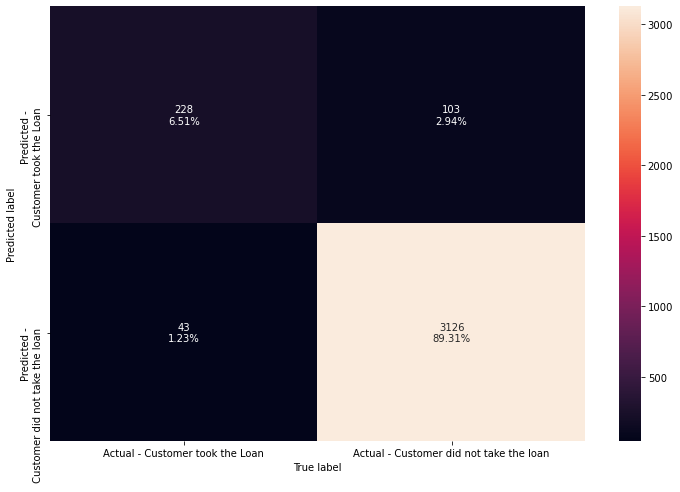

In [67]:
#confusion matrix train data
make_confusion_matrix(log_reg10,'stats',X_train,y_train)

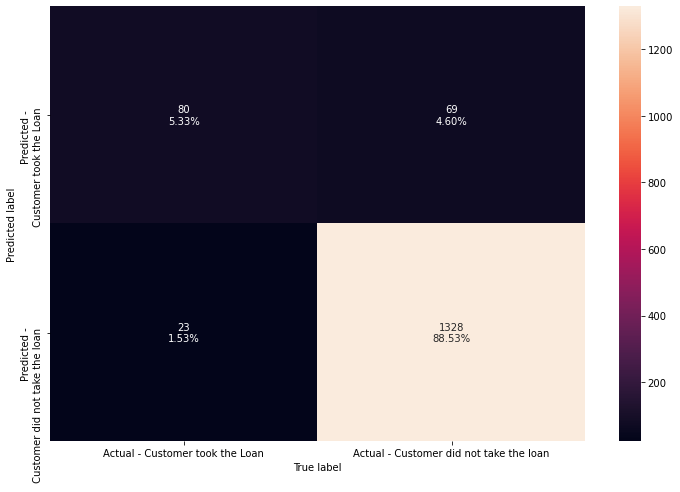

In [68]:
#confusion matrix test data
make_confusion_matrix(log_reg10,'stats',X_test,y_test)
 

We built a logistic model to show good results for training and test data.     
We can see that Accuracy, Recall, Precision, and F1 are providing good results.      
But we need to perform statistical tests and statistical data exploration.


# <a name='link8'>Logistic Regression - Model performance evaluation and improvement </a>

 ### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [69]:
# changing datatype of colums to numeric for checking vif
X_train_num10 = X_train.astype(float).copy()

In [70]:
# Perform the VIF test
vif_series10 = pd.Series([variance_inflation_factor(X_train_num10.values,i) for i in range(X_train_num10.shape[1])],index=X_train_num10.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series10))

Series before feature selection: 

Age                                    106.283978
Experience                              37.500559
Income                                   6.469065
Family                                   5.548625
CCAvg                                    4.481486
Education                                6.671637
Mortgage                                 1.413874
Securities_Account                       1.291404
CD_Account                               1.458918
Online                                   2.574105
CreditCard                               1.596375
County_fixed_Butte County                1.039143
County_fixed_Contra Costa County         1.154773
County_fixed_El Dorado County            1.030557
County_fixed_Fresno County               1.037726
County_fixed_Humboldt County             1.066366
County_fixed_Imperial County             1.006697
County_fixed_Kern County                 1.102446
County_fixed_Lake County                 1.010652
County_fixed_Lo

The above data shows Age and Experience are correlated. We knew Age to Experience correlation is very similar based on previous analysis so we can drop one of them.

In [71]:
# Let drop experience and perform the VIF test again
X_train_num11 = X_train_num10.drop('Experience',axis=1)
vif_series11 = pd.Series([variance_inflation_factor(X_train_num11.values,i) for i in range(X_train_num11.shape[1])],index=X_train_num11.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series11))

Series before feature selection: 

Age                                    10.400136
Income                                  6.100718
Family                                  4.789178
CCAvg                                   4.441383
Education                               5.433607
Mortgage                                1.408188
Securities_Account                      1.280443
CD_Account                              1.424872
Online                                  2.480220
CreditCard                              1.572667
County_fixed_Butte County               1.034528
County_fixed_Contra Costa County        1.122370
County_fixed_El Dorado County           1.023945
County_fixed_Fresno County              1.031553
County_fixed_Humboldt County            1.051916
County_fixed_Imperial County            1.006520
County_fixed_Kern County                1.083100
County_fixed_Lake County                1.008934
County_fixed_Los Angeles County         2.694037
County_fixed_Marin County         

In [72]:
# Let drop Age as the value is bigger than 10 and perform the VIF test again
X_train_num12 = X_train_num11.drop('Age',axis=1)
vif_series12 = pd.Series([variance_inflation_factor(X_train_num12.values,i) for i in range(X_train_num12.shape[1])],index=X_train_num12.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series12))

Series before feature selection: 

Income                                 5.918485
Family                                 4.500561
CCAvg                                  4.439652
Education                              4.742271
Mortgage                               1.405709
Securities_Account                     1.275810
CD_Account                             1.414655
Online                                 2.411050
CreditCard                             1.551371
County_fixed_Butte County              1.026619
County_fixed_Contra Costa County       1.105532
County_fixed_El Dorado County          1.019553
County_fixed_Fresno County             1.026838
County_fixed_Humboldt County           1.041720
County_fixed_Imperial County           1.005733
County_fixed_Kern County               1.068920
County_fixed_Lake County               1.006925
County_fixed_Los Angeles County        2.366660
County_fixed_Marin County              1.071322
County_fixed_Mendocino County          1.016938
Count

We can say we solved the multicollinearity issues based on the results we received above.    
We can proceed to run the final logistic model again. 


In [73]:
log_reg12 = sm.Logit(y_train, X_train_num12 ).fit()
print(log_reg12.summary())

         Current function value: 0.236350
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3453
Method:                           MLE   Df Model:                           46
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.2449
Time:                        15:02:35   Log-Likelihood:                -827.23
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                 8.335e-85
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                                  0.0169      0.002     10.652      0.000       0.014   

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Some of the results we are showing high P-Values > 0.05% , so we should delete these variables w/o significance : 
-	Securities_Account 
-   Mortgage  
-	County_fixed_Butte County
-	County_fixed_Imperial County
-	County_fixed_Lake County  
-	County_fixed_Napa County
-	County_fixed_Merced County  
-	County_fixed_NONE
-	County_fixed_Placer County 
-	County_fixed_San Joaquin County
-	County_fixed_Siskiyou County
-	County_fixed_Stanislaus County 
-	County_fixed_Sonoma County 
-	County_fixed_Trinity County
-	County_fixed_Tuolumne County


In [74]:
X_train_num13 = X_train_num12.drop(
    ['Securities_Account',
     'Mortgage',
    'County_fixed_Butte County',
    'County_fixed_Imperial County',
    'County_fixed_Lake County',
    'County_fixed_Napa County',
    'County_fixed_Merced County',
    'County_fixed_NONE',
    'County_fixed_Placer County',
    'County_fixed_San Joaquin County',
    'County_fixed_Siskiyou County',
    'County_fixed_Stanislaus County',
    'County_fixed_Sonoma County',
    'County_fixed_Trinity County',
    'County_fixed_Tuolumne County'],
     axis=1)

In [75]:
# Let build our another logistic model after deleting the insignificant variables 
log_reg13 = sm.Logit(y_train, X_train_num13 ).fit()
print(log_reg13.summary())

         Current function value: 0.251842
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3468
Method:                           MLE   Df Model:                           31
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.1954
Time:                        15:02:41   Log-Likelihood:                -881.45
converged:                      False   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                 2.248e-71
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                                  0.0158      0.002     10.420      0.000       0.013   

C:\Users\ylapin\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Some of the results we are showing high P-Values > 0.05% , so we should delete these variables w/o significance : 
- County_fixed_Fresno County  
- County_fixed_Mendocino County    
- County_fixed_San Benito County 
- County_fixed_Shasta County   
- County_fixed_El Dorado County

In [76]:
X_train_num14 = X_train_num13.drop(
    ['County_fixed_Fresno County',
     'County_fixed_Mendocino County',
    'County_fixed_San Benito County',
    'County_fixed_Shasta County',
    'County_fixed_El Dorado County'],
     axis=1)

In [77]:
log_reg14 = sm.Logit(y_train, X_train_num14 ).fit()
print(log_reg14.summary())

Optimization terminated successfully.
         Current function value: 0.254821
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3473
Method:                           MLE   Df Model:                           26
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.1858
Time:                        15:02:46   Log-Likelihood:                -891.87
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                 4.311e-70
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                                  0.0151      0.001 

The model shows a good P-value < 0.05, so they are significant. Let check the performance deeper.

In [78]:
# Let prepare the test data   as we did with the train one before running the last logistic model14

X_test_num14 = X_test.drop(
    [   'Experience',
        
       'Age',
     
      'Securities_Account',
     'Mortgage',
    'County_fixed_Butte County',
    'County_fixed_Imperial County',
    'County_fixed_Lake County',
    'County_fixed_Napa County',
    'County_fixed_Merced County',
    'County_fixed_NONE',
    'County_fixed_Placer County',
    'County_fixed_San Joaquin County',
    'County_fixed_Siskiyou County',
    'County_fixed_Stanislaus County',
    'County_fixed_Sonoma County',
    'County_fixed_Trinity County',
    'County_fixed_Tuolumne County',
        
     'County_fixed_Fresno County',
     'County_fixed_Mendocino County',
    'County_fixed_San Benito County',
    'County_fixed_Shasta County',
    'County_fixed_El Dorado County'
    
    ],
     axis=1)

In [79]:
# Let build our final logistic model after deleting the insignificant variables 
log_reg14 = sm.Logit(y_test, X_test_num14 ).fit()
print(log_reg14.summary())

Optimization terminated successfully.
         Current function value: 0.272678
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1473
Method:                           MLE   Df Model:                           26
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.1574
Time:                        15:02:52   Log-Likelihood:                -409.02
converged:                       True   LL-Null:                       -485.42
Covariance Type:            nonrobust   LLR p-value:                 6.417e-20
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Income                                  0.0160      0.002 

Accuracy on training set :  0.8971428571428571
Accuracy on test set :  0.8906666666666667
Recall on training set :  0.27492447129909364
Recall on test set :  0.24161073825503357
Precision on training set :  0.4312796208530806
Precision on test set :  0.41379310344827586
F1 on training set :  0.3357933579335794
F1 on test set :  0.3050847457627119


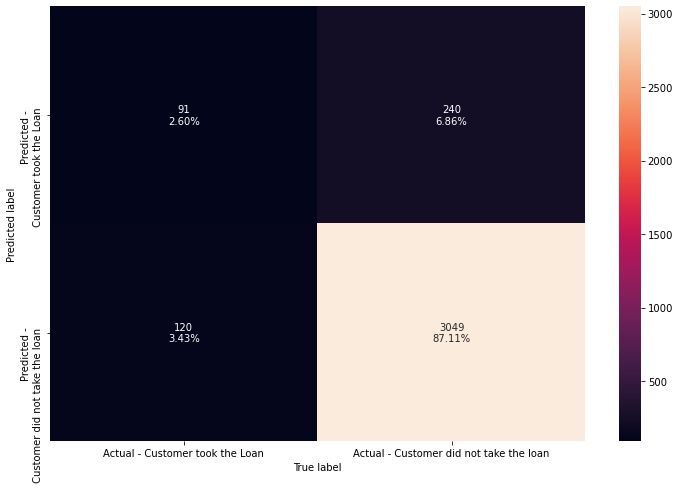

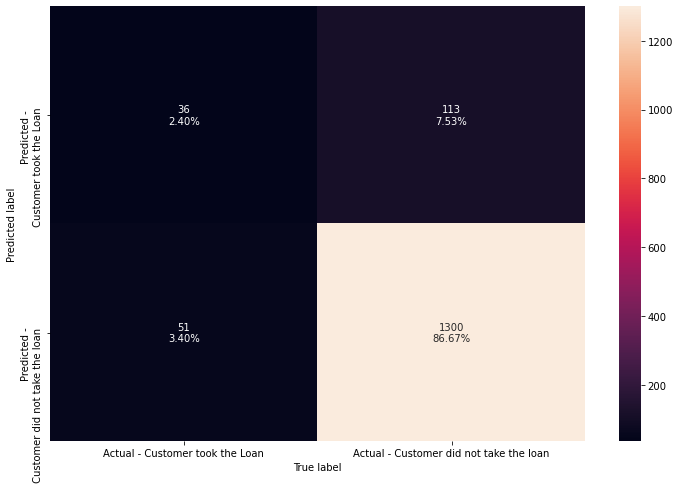

In [80]:
# Let's check model performances for this model
scores_LR = get_metrics_score(log_reg14,'stats',X_train_num14,X_test_num14,y_train,y_test)


#confusion matrix
make_confusion_matrix(log_reg14,'stats',X_train_num14,y_train)

#confusion matrix
make_confusion_matrix(log_reg14,'stats',X_test_num14,y_test)




### Observations from the Logistic Model

All performance metrics are very similar between train and test dataframes, so this is a good signal.    
Accuracy is almost ~90%.     
The Recall is low ~25%, false-negative implies fewer chances of predicting a customer will take a loan the customer won't take. 
So It's good to look into other metrics.   
Precession is having a trade-off relationship with Recall and the model is showing 41%, which means it 41% went off.   
Last,  the metric taking into consideration Recall and Pression, F1 is showing 30% to 33% depending on the dataframe. But it's still far from being perfect, F1 = 1.      

From a coefficient perspective having a certificate of deposit has a positive impact, the rest are having negative coefficient, sorted by importance:     
-County_fixed_Santa Barbara County   
-County_fixed_Sacramento County   
-County_fixed_San Bernardino County    
-And others….   


# <a name='link9'>Model building - Decision Tree </a>

In [81]:
# Let create a copy of the data set before the split 
loan20 = loan3.copy() 

In [82]:
loan20.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.617400,45.626122,8.0,39.0,64.0,98.0,186.5
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.831338,1.452215,0.0,0.7,1.5,2.5,5.2
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,50.494700,83.005401,0.0,0.0,0.0,101.0,252.5
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [83]:
# Let define the X and Y variables 
X20 = loan20.drop("Personal_Loan" , axis=1)
y20 = loan20.pop("Personal_Loan")

In [84]:
# Create train and test data set
X_train20, X_test20, y_train20, y_test20 = train_test_split(X20, y20, test_size=.30, random_state=1)

In [85]:
# Create the decision tree
dTree20 = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree20.fit(X_train20, y_train20)

DecisionTreeClassifier(random_state=1)

In [86]:
# Let check the train and tets dataframe accuracy
print("Accuracy on training set : ",dTree20.score(X_train20, y_train20))
print("Accuracy on test set : ",dTree20.score(X_test20, y_test20))

Accuracy on training set :  1.0
Accuracy on test set :  0.978


In [87]:
#Checking number of positives
y20.sum(axis = 0)

480

In [88]:
## Function to create a confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test20)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Did not take the loan","Took the loan"]],
                  columns = [i for i in ['Did not take the loan','Took the loan']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

In [89]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train20)
    pred_test = model.predict(X_test20)
    print("Recall on training set : ",metrics.recall_score(y_train20,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test20,pred_test))

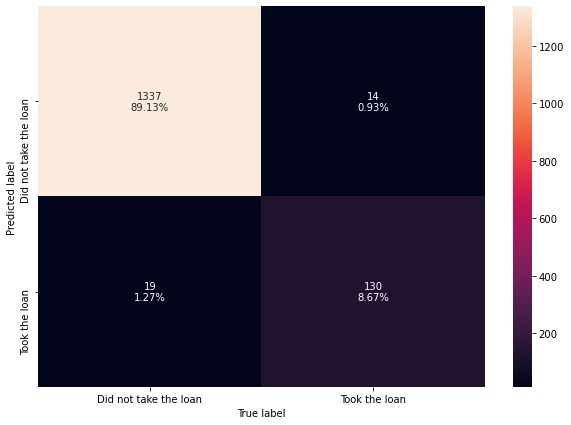

In [90]:
make_confusion_matrix(dTree20,y_test20)

In [91]:
# Recall on train and test
get_recall_score(dTree20)

Recall on training set :  1.0
Recall on test set :  0.87248322147651


It’s very clear with the training data frame having a 100% and test data frame ~87%, the decision tree model is overfitting 

In [92]:
# Let check the variables names
feature_names = list(X20.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'County_fixed_Butte County', 'County_fixed_Contra Costa County', 'County_fixed_El Dorado County', 'County_fixed_Fresno County', 'County_fixed_Humboldt County', 'County_fixed_Imperial County', 'County_fixed_Kern County', 'County_fixed_Lake County', 'County_fixed_Los Angeles County', 'County_fixed_Marin County', 'County_fixed_Mendocino County', 'County_fixed_Merced County', 'County_fixed_Monterey County', 'County_fixed_NONE', 'County_fixed_Napa County', 'County_fixed_Orange County', 'County_fixed_Placer County', 'County_fixed_Riverside County', 'County_fixed_Sacramento County', 'County_fixed_San Benito County', 'County_fixed_San Bernardino County', 'County_fixed_San Diego County', 'County_fixed_San Francisco County', 'County_fixed_San Joaquin County', 'County_fixed_San Luis Obispo County', 'County_fixed_San Mateo County', 'County_fixed_Santa Barbara Coun

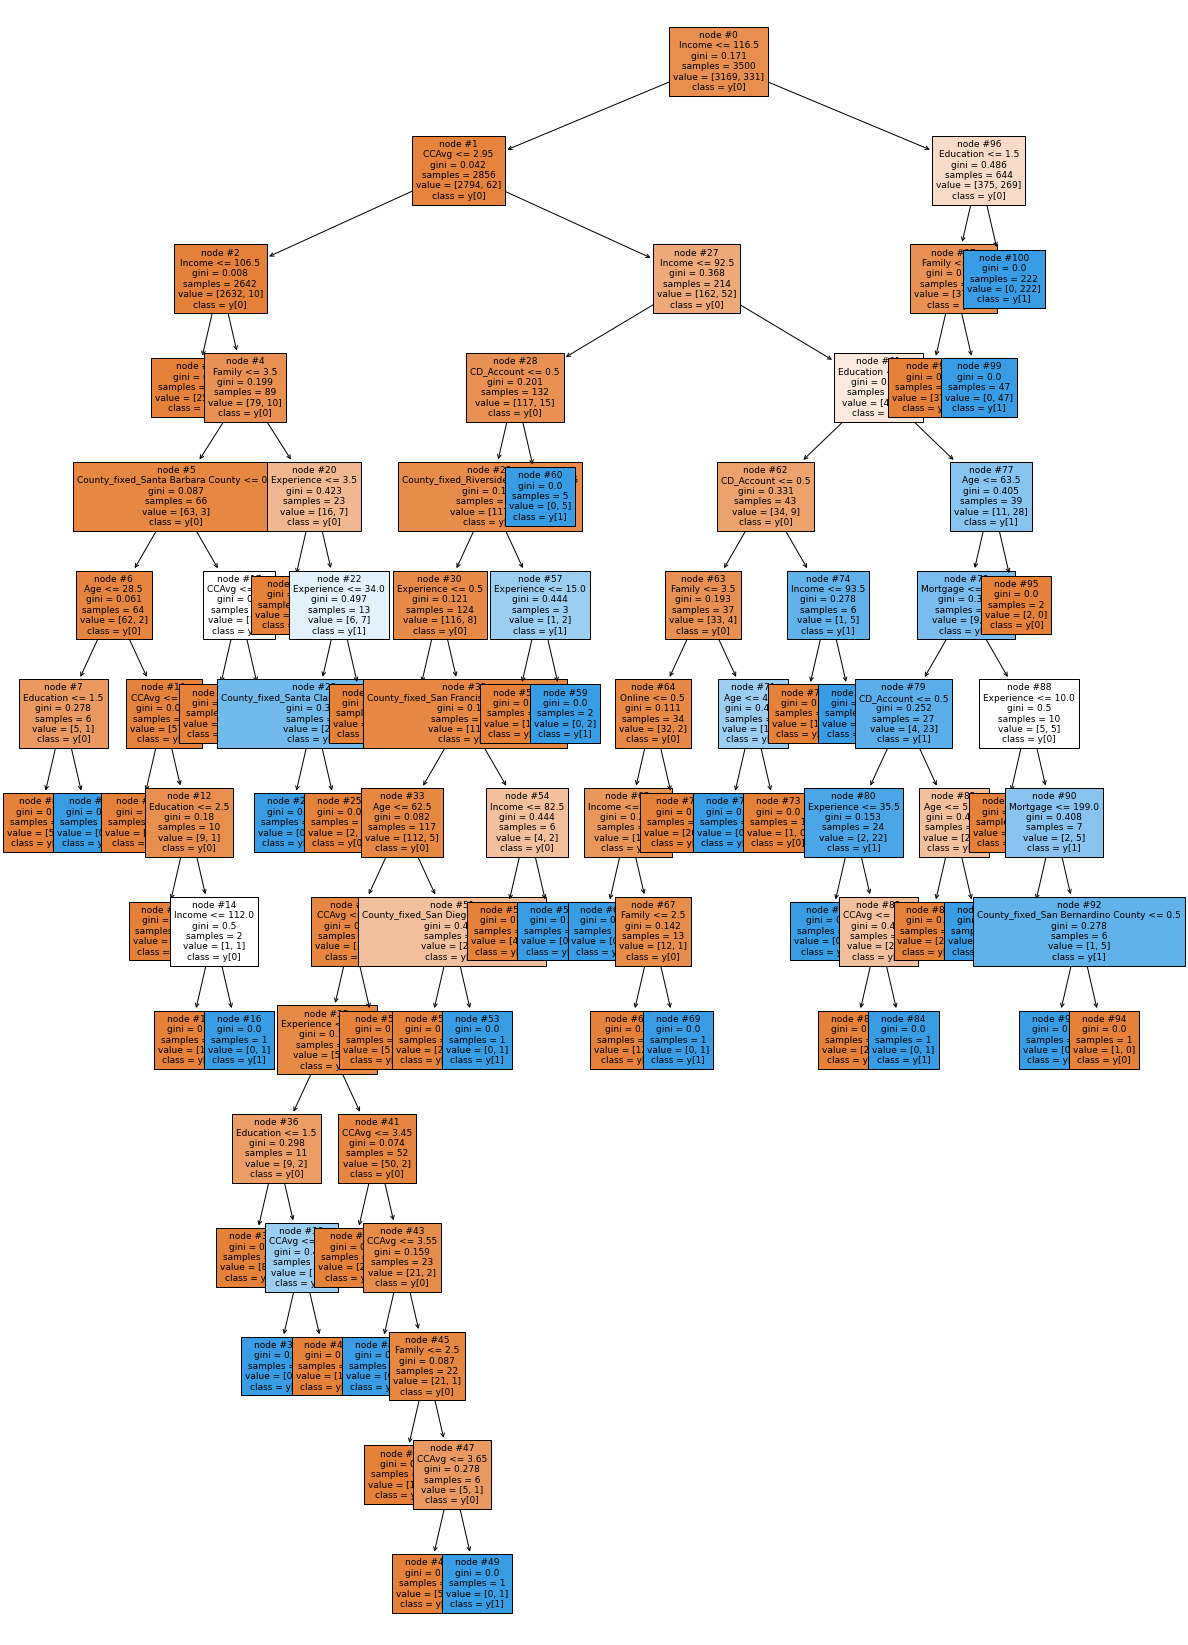

In [93]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree20,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [94]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree20,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- County_fixed_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   

In [95]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree20.feature_importances_, columns = ["Imp"], index = X_train20.columns).sort_values(by = 'Imp', ascending = False))

                                          Imp
Education                            0.408303
Income                               0.309354
Family                               0.150056
CCAvg                                0.050581
CD_Account                           0.025711
Experience                           0.024317
Age                                  0.009347
County_fixed_Santa Clara County      0.005190
Mortgage                             0.005001
County_fixed_Riverside County        0.003544
County_fixed_San Bernardino County   0.002781
County_fixed_San Diego County        0.002224
County_fixed_San Francisco County    0.001608
County_fixed_Santa Barbara County    0.001422
Online                               0.000561
County_fixed_San Mateo County        0.000000
County_fixed_San Benito County       0.000000
County_fixed_Ventura County          0.000000
County_fixed_San Joaquin County      0.000000
County_fixed_San Luis Obispo County  0.000000
County_fixed_Tuolumne County      

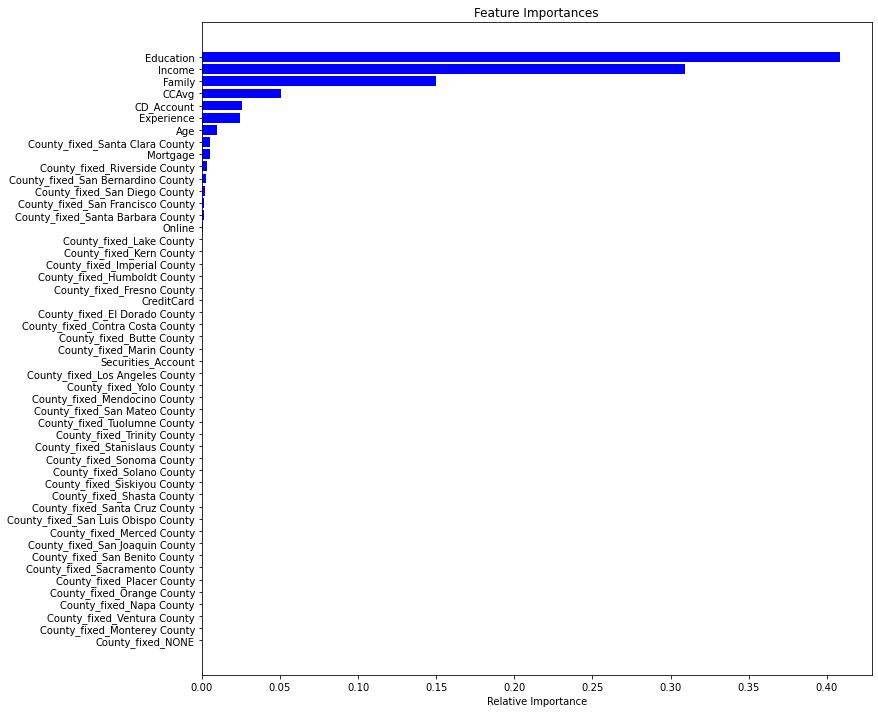

In [96]:
importances = dTree20.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



### Model Observations
The decision tree is big and complex, as well as driving overfitting.     
It shows the most important factors for a customer to take a loan are education, income, family, average credit spending, and certificate of deposits.     
But we need to look into improving the model.  


# <a name='link10'>Decision Tree - Model performance evaluation and improvement </a>

## Reducing over fitting

In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
 and it captures more information about the data and this is one of the root causes of overfitting.


### Pre-Pruning 

In [97]:
# Let's try Limiting the max_depth of tree to 4, pre pruning
dTree21 = DecisionTreeClassifier(criterion = 'gini',max_depth=4,random_state=1)
dTree21.fit(X_train20, y_train20)

DecisionTreeClassifier(max_depth=4, random_state=1)

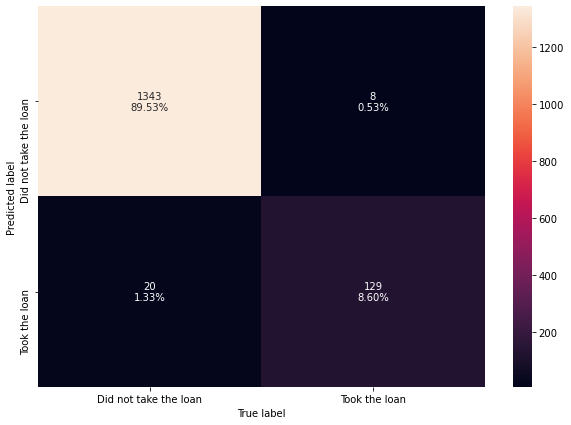

In [98]:
# Let print the confusion matrix for the simplified tree with test dataframe 
make_confusion_matrix(dTree21, y_test20)

In [99]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree21.score(X_train20, y_train20))
print("Accuracy on test set : ",dTree21.score(X_test20, y_test20))
# Recall on train and test
get_recall_score(dTree21)

Accuracy on training set :  0.9885714285714285
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9123867069486404
Recall on test set :  0.8657718120805369


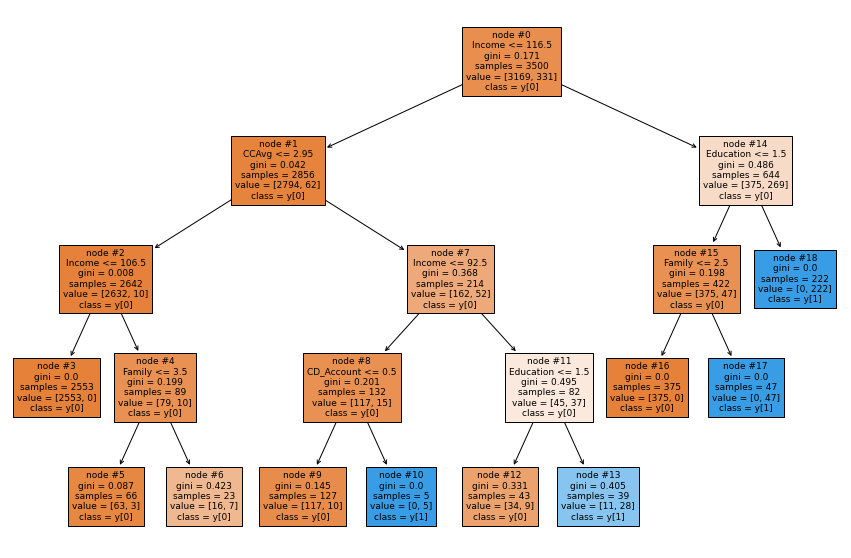

In [100]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree21,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [101]:
# Text report showing the rules of a decision tree  

print(tree.export_text(dTree21,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [34.00, 9.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   | 

In [102]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree21.feature_importances_, columns = ["Imp"], index = X_train20.columns).sort_values(by = 'Imp', ascending = False))

                                          Imp
Education                            0.448813
Income                               0.333366
Family                               0.160264
CCAvg                                0.042308
CD_Account                           0.015249
Age                                  0.000000
County_fixed_Santa Clara County      0.000000
County_fixed_Sacramento County       0.000000
County_fixed_San Benito County       0.000000
County_fixed_San Bernardino County   0.000000
County_fixed_San Diego County        0.000000
County_fixed_San Francisco County    0.000000
County_fixed_San Joaquin County      0.000000
County_fixed_San Luis Obispo County  0.000000
County_fixed_San Mateo County        0.000000
County_fixed_Santa Barbara County    0.000000
County_fixed_Siskiyou County         0.000000
County_fixed_Santa Cruz County       0.000000
County_fixed_Shasta County           0.000000
County_fixed_Placer County           0.000000
County_fixed_Solano County        

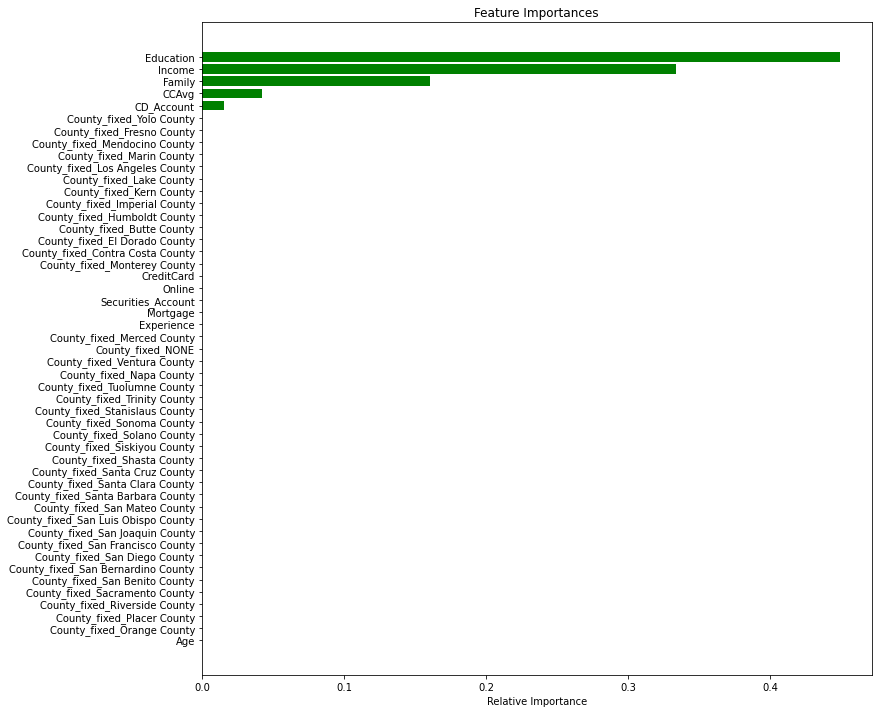

In [103]:
importances = dTree21.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



### Model Observations - improve by Pre pruning limiting the depth to four
The decision tree is simpler.     
It shows the most important factors for a customer to take a loan are still education, income, family, average credit spending, and certificate of deposits.     
But we can see Accuracy is almost the same for training and test dataframe, 98%. And Recall 91% for training and 86% for the test are still close enough.



### Post-Pruning

Using Grid Search technique to choose the best decision tree reduction option from the full original decision tree

In [104]:
# Using GridSearch for Hyperparameter tuning of our tree model
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 8],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj22 = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj22 = grid_obj22.fit(X_train20, y_train20)

# Set the clf to the best combination of parameters
estimator = grid_obj22.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train20, y_train20)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

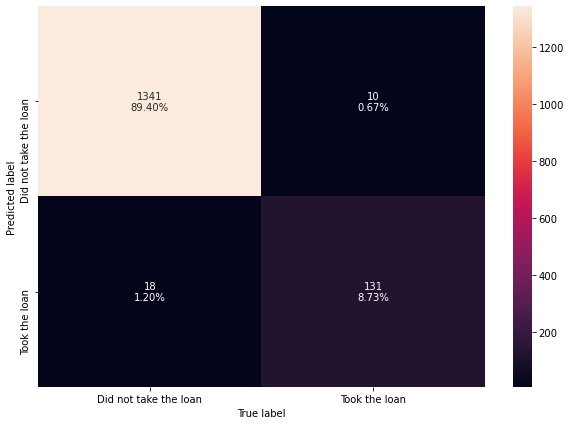

In [105]:
make_confusion_matrix(estimator,y_test20)

In [106]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train20, y_train20))
print("Accuracy on test set : ",estimator.score(X_test20, y_test20))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9897142857142858
Accuracy on test set :  0.9813333333333333
Recall on training set :  0.9274924471299094
Recall on test set :  0.8791946308724832


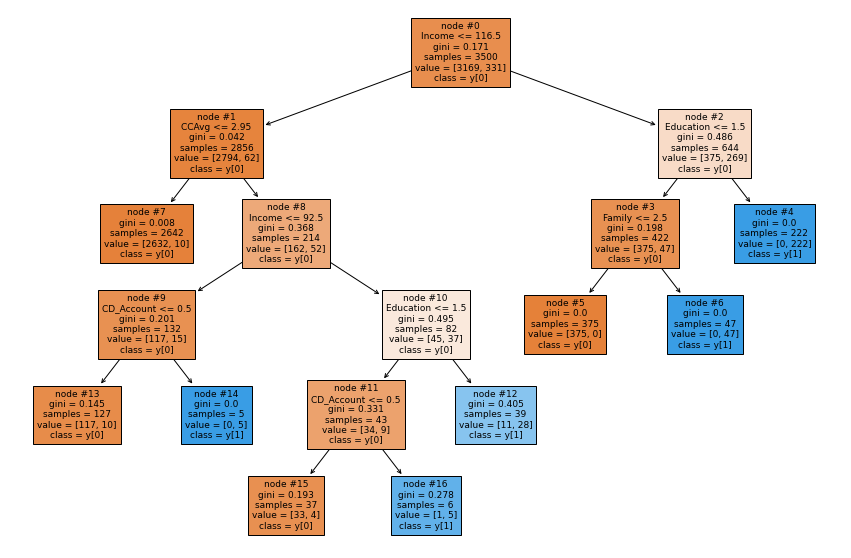

In [107]:
# Let plot the decision tree
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [108]:
# Text report showing the rules of a decision tree 

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



In [109]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train20.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                          Imp
Education                            0.447999
Income                               0.328713
Family                               0.155711
CCAvg                                0.042231
CD_Account                           0.025345
Age                                  0.000000
County_fixed_Santa Clara County      0.000000
County_fixed_Sacramento County       0.000000
County_fixed_San Benito County       0.000000
County_fixed_San Bernardino County   0.000000
County_fixed_San Diego County        0.000000
County_fixed_San Francisco County    0.000000
County_fixed_San Joaquin County      0.000000
County_fixed_San Luis Obispo County  0.000000
County_fixed_San Mateo County        0.000000
County_fixed_Santa Barbara County    0.000000
County_fixed_Siskiyou County         0.000000
County_fixed_Santa Cruz County       0.000000
County_fixed_Shasta County           0.000000
County_fixed_Placer County           0.000000
County_fixed_Solano County        

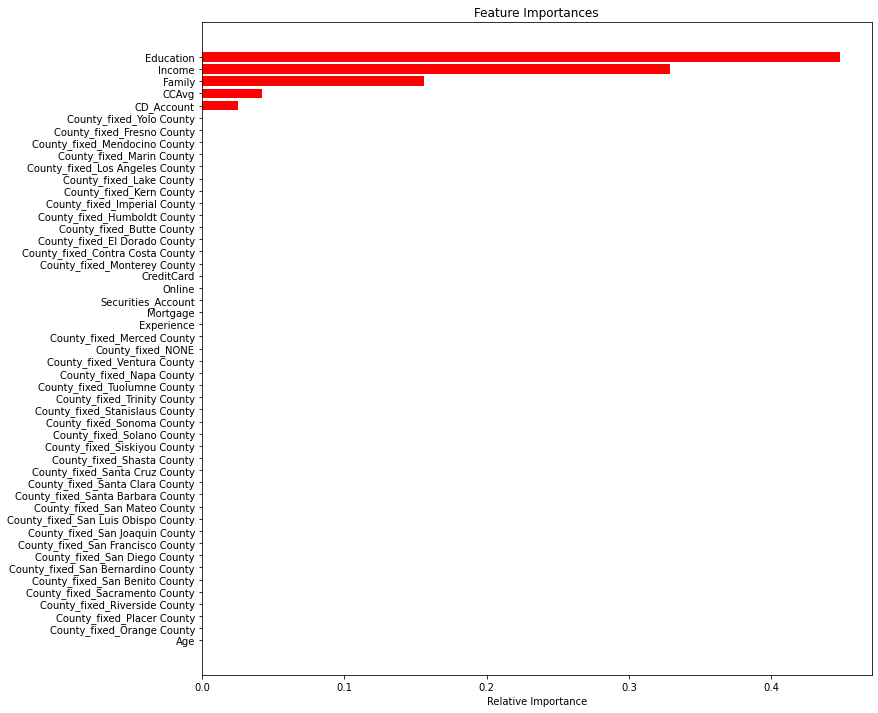

In [110]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Observations -  using grid search with predefined hyperparameters to find the best one out of the options
The decision tree is simpler than the original one.     
It shows the most important factors for a customer to take a loan are as well education, income, family, average credit spending, and certificate of deposits. It's very consistent across the decision tree models so far.     
But we can see Accuracy is almost the same for training and test dataframe, 98%. And Recall 92% for training and 87% for the test are still close enough.


### Cost Complexity 
The cost complexity measure comes as a penalized version of the resubstitution error rate. This is the function to be minimized when pruning the tree.

In [111]:
# Using decision tree classifier library to calculate the cost of complexity to choose the optimal decision tree
clf23 = DecisionTreeClassifier(random_state=1)
path23 = clf23.cost_complexity_pruning_path(X_train20, y_train20)
ccp_alphas, impurities = path23.ccp_alphas, path23.impurities

In [112]:
# Printing the alpha values
pd.DataFrame(path23)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000269,0.001636
3,0.000273,0.002182
4,0.000274,0.004371
5,0.000359,0.005447
6,0.000381,0.005828
7,0.000381,0.006209
8,0.000381,0.006590
9,0.000381,0.006971


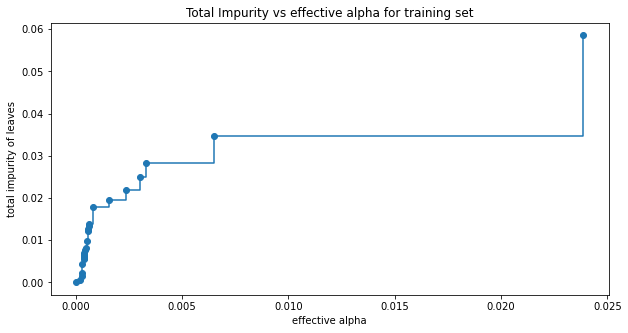

In [113]:
# Printing the results graphically 
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

We train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree with one node.

In [114]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf23 = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf23.fit(X_train20, y_train20)
    clfs.append(clf23)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575



For the remainder, we remove the last element and ccp_alphas, because it is the trivial tree with only one node. 
Here we show that the number of nodes and tree depth decreases as alpha increases.

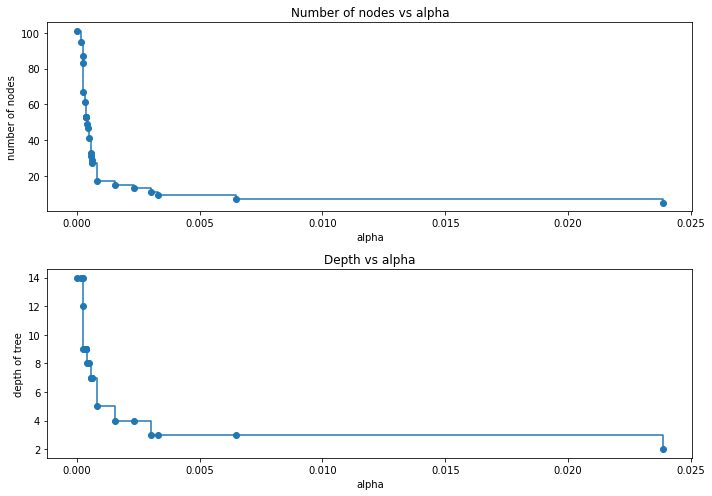

In [115]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf23.tree_.node_count for clf23 in clfs]
depth = [clf23.tree_.max_depth for clf23 in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets


If ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to
a 100% training accuracy and ~97,5% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [116]:
train_scores23 = [clf23.score(X_train20, y_train20) for clf23 in clfs]
test_scores23 = [clf23.score(X_test20, y_test20) for clf23 in clfs]

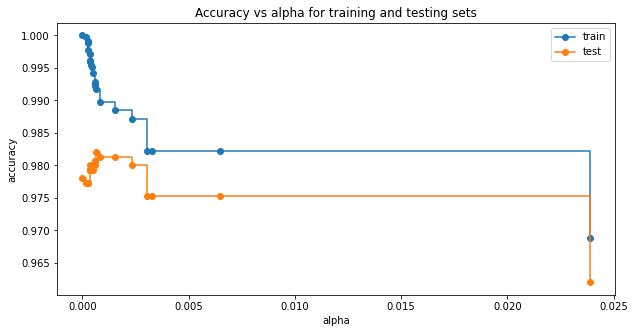

In [117]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores23, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores23, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [118]:
# Looks for the best model 
index_best_model = np.argmax(test_scores23)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train20, y_train20))
print('Test accuracy of best model: ',best_model.score(X_test20, y_test20))

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)
Training accuracy of best model:  0.9917142857142857
Test accuracy of best model:  0.982


In [119]:
# Recall for training dataframe
recall_train=[]
for clf23 in clfs:
    pred_train23=clf23.predict(X_train20)
    values_train23=metrics.recall_score(y_train20,pred_train23)
    recall_train.append(values_train23)

In [120]:
# Recall for test dataframe
recall_test=[]
for clf23 in clfs:
    pred_test23=clf23.predict(X_test20)
    values_test23=metrics.recall_score(y_test20,pred_test23)
    recall_test.append(values_test23)

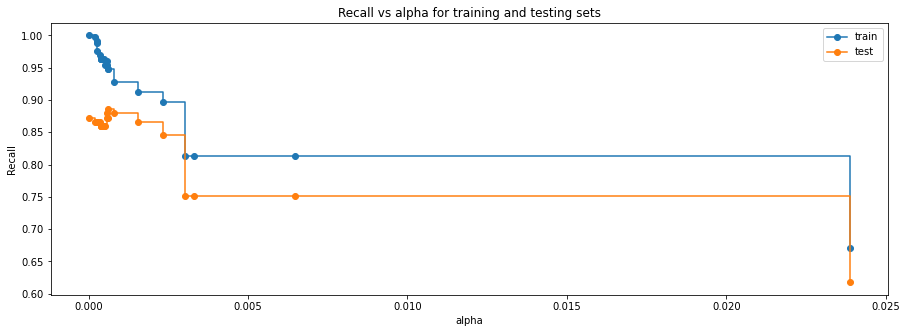

In [121]:
# Lets plot the results
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [122]:
# creating the model where we get highest training and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


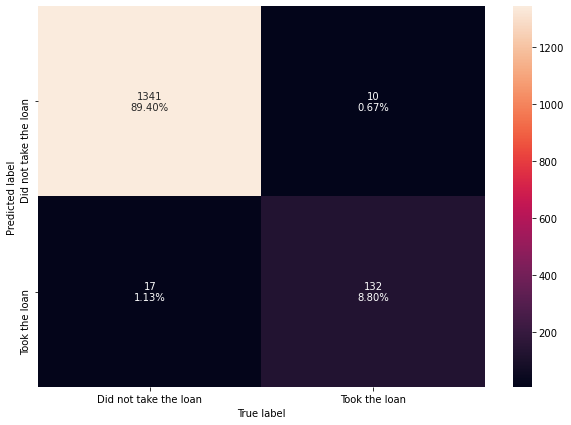

In [123]:
make_confusion_matrix(best_model,y_test20)

In [124]:
# Recall on training and test
get_recall_score(best_model)

Recall on training set :  0.9486404833836858
Recall on test set :  0.8859060402684564


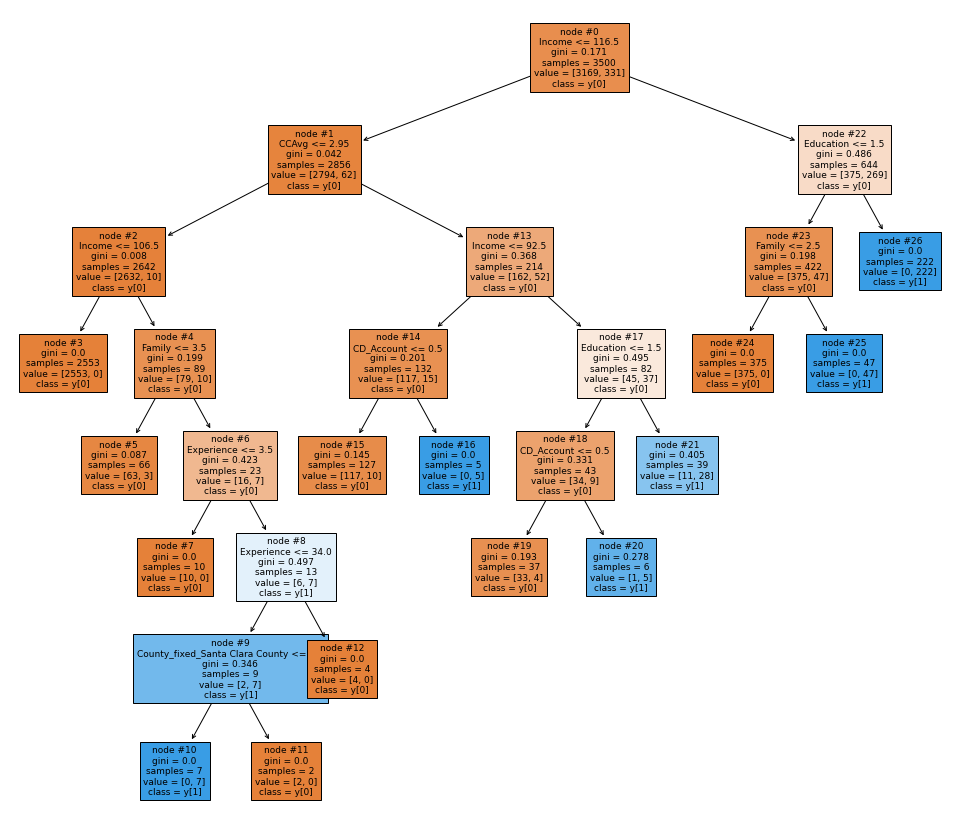

In [125]:
# Lets plot the model 
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [126]:
# Text report showing the rules of a decision tree  

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Experience <= 34.00
|   |   |   |   |   |   |--- County_fixed_Santa Clara County <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 7.00] class: 1
|   |   |   |   |   |   |--- County_fixed_Santa Clara County >  0.50
|   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |--- Experience >  34.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  

In [127]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train20.columns).sort_values(by = 'Imp', ascending = False))

                                          Imp
Education                            0.436448
Income                               0.324182
Family                               0.155849
CCAvg                                0.041142
CD_Account                           0.024692
Experience                           0.012037
County_fixed_Santa Clara County      0.005650
Age                                  0.000000
County_fixed_San Benito County       0.000000
County_fixed_San Bernardino County   0.000000
County_fixed_San Diego County        0.000000
County_fixed_San Francisco County    0.000000
County_fixed_San Joaquin County      0.000000
County_fixed_San Luis Obispo County  0.000000
County_fixed_San Mateo County        0.000000
County_fixed_Santa Barbara County    0.000000
County_fixed_Siskiyou County         0.000000
County_fixed_Santa Cruz County       0.000000
County_fixed_Shasta County           0.000000
County_fixed_Riverside County        0.000000
County_fixed_Solano County        

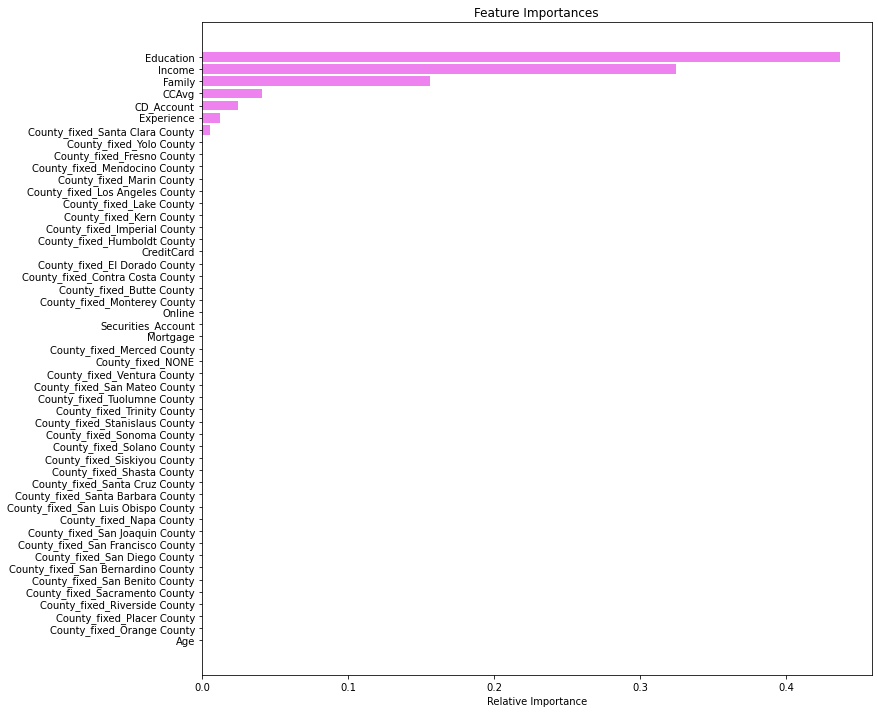

In [128]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observations, model improved by Cost Complexity  

The decision tree is simpler than the original one.     
It shows the most important factors for a customer to take a loan are as well education, income, family, average credit spending, and certificate of deposits. But this model is adding experience and Santa Clara County.     
Recall 94% for training and 88% for the test are still close enough.


## Comparing all the decision tree models

In [129]:
comparison_frame = pd.DataFrame({'Model':['Original decision tree model','Pre Pruning decision tree model, limiting the depth to 4','Post Pruning decision tree model, Grid search with predefined hyperparameters',
                                         'Cost Complexity decision tree model'], 'Train_Recall':[1,0.91,0.92,0.94], 'Test_Recall':[0.87,0.86,0.87,0.88]}) 
comparison_frame

,Model,Train_Recall,Test_Recall
0,Original decision tree model,1.00,0.87
1,"Pre Pruning decision tree model, limiting the ...",0.91,0.86
2,"Post Pruning decision tree model, Grid search ...",0.92,0.87
3,Cost Complexity decision tree model,0.94,0.88


###### Decision tree models conclusion:    
Per the results above, it looks the best decision tree is the Cost on Complexity model. It has the best Recall results. 


# <a name='link11'> Conclusions and wrap up </a>

The EDA uncovered the geographical distribution Pareto, 4 counties accounting for more than half of the customers. The bank needs to focus on these locations first.
As well some counties are having a ~20% conversion rate to a borrower, higher than the avg. The below can explain some of the reasons. 


The logistic model showed the certificate of deposit has a positive impact, the rest are having negative coefficients especially County, sorted by importance:  Santa Barbara County,  Sacramento County,  San Bernardino County. The bank should explore the reasons some counties are having negative impacts related to the probability of taking a loan. For example, Santa Clara is an important County but with a negative coefficient. 

The decision tree models showed by order: education, income, family, average credit spending, and certificate of deposits are the variables impacting the probability of a customer to take a loan. This is consistent across the models. 
As the probability to take loans is higher for educated and higher-income customers. The bank needs to focus efforts to target them with special marketing campaigns.  Less important credit card spending and certificate of deposits increase the probability, so if the bank can offer fee discounts or cash returns in case of taking a loan, of course depending on the loan amount. 
